# EDA and Prediction

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
!pip install lifelines

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns;sns.set(style='whitegrid')
import matplotlib.ticker as mtick
from lifelines import KaplanMeierFitter  # Import KaplanMeierFitter class

%matplotlib inline

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 350.7/350.7 kB 4.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 91.0/91.0 kB 9.1 MB/s eta 0:00:00
  Created wheel for autograd-gamma: filename=autograd_gamma-0.5.0-py3-none-any.whl size=4031 sha256=cf78bb0980484afe6562368a005d79b9a6897c475c76f69b493d53830c1a5630
  Stored in directory: /root/.cache/pip/wheels/25/cc/e0/ef2969164144c899fedb22b338f6703e2b9cf46eeebf254991
Successfully built autograd-gamma


In [3]:
pd.options.display.max_rows=None
pd.options.display.max_columns=None

In [4]:
df = pd.read_excel('/content/drive/MyDrive/Bootcamp/merged.xlsx')

In [5]:
df.head(2)

Customer ID Gender Under 30 Senior Citizen Married Dependents  \
0  8779-QRDMV   Male       No            Yes      No         No   
1  4737-AQCPU   Male       No             No     Yes         No   

  Referred a Friend  Tenure in Months Phone Service  \
0                No                 1            No   
1               Yes                72           Yes   

   Avg Monthly Long Distance Charges Multiple Lines Internet Service  \
0                               0.00             No              Yes   
1                              42.55            Yes              Yes   

  Internet Type Online Security Online Backup Device Protection Plan  \
0           DSL              No            No                    Yes   
1           DSL             Yes           Yes                    Yes   

  Premium Tech Support Streaming TV Streaming Movies Streaming Music  \
0                   No           No              Yes              No   
1                  Yes           No               No              No   

  Unlimited Data        Contract Paperless Billing   Payment Method  \
0             No  Month-to-Month               Yes  Bank Withdrawal   
1            Yes        Two Year                No      Credit Card   

   Monthly Charge  Total Charges  Total Refunds  Total Extra Data Charges  \
0           39.65          39.65            0.0                        20   
1           72.10        5016.65            0.0                         0   

   Total Long Distance Charges  Total Revenue  Satisfaction Score Churn Label  \
0                          0.0          59.65                   3         Yes   
1                       3063.6        8080.25                   3          No   

   Churn Score  CLTV Churn Category                  Churn Reason  
0           91  5433     Competitor  Competitor offered more data  
1           42  4658            NaN                           NaN

In [6]:
df_columns = df.columns.values
df_columns

array(['Customer ID', 'Gender', 'Under 30', 'Senior Citizen', 'Married',
       'Dependents', 'Referred a Friend', 'Tenure in Months',
       'Phone Service', 'Avg Monthly Long Distance Charges',
       'Multiple Lines', 'Internet Service', 'Internet Type',
       'Online Security', 'Online Backup', 'Device Protection Plan',
       'Premium Tech Support', 'Streaming TV', 'Streaming Movies',
       'Streaming Music', 'Unlimited Data', 'Contract',
       'Paperless Billing', 'Payment Method', 'Monthly Charge',
       'Total Charges', 'Total Refunds', 'Total Extra Data Charges',
       'Total Long Distance Charges', 'Total Revenue',
       'Satisfaction Score', 'Churn Label', 'Churn Score', 'CLTV',
       'Churn Category', 'Churn Reason'], dtype=object)

In [7]:
df.info(verbose=True, show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 36 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Customer ID                        7043 non-null   object 
 1   Gender                             7043 non-null   object 
 2   Under 30                           7043 non-null   object 
 3   Senior Citizen                     7043 non-null   object 
 4   Married                            7043 non-null   object 
 5   Dependents                         7043 non-null   object 
 6   Referred a Friend                  7043 non-null   object 
 7   Tenure in Months                   7043 non-null   int64  
 8   Phone Service                      7043 non-null   object 
 9   Avg Monthly Long Distance Charges  7043 non-null   float64
 10  Multiple Lines                     7043 non-null   object 
 11  Internet Service                   7043 non-null   objec

In [8]:
numeric_df = df.select_dtypes(include=['int64', 'float64'])
numeric_df.head()


Tenure in Months  Avg Monthly Long Distance Charges  Monthly Charge  \
0                 1                               0.00           39.65   
1                72                              42.55           72.10   
2                 1                               7.11           75.55   
3                66                               0.00           56.75   
4                 7                              36.49           94.05   

   Total Charges  Total Refunds  Total Extra Data Charges  \
0          39.65            0.0                        20   
1        5016.65            0.0                         0   
2          75.55            0.0                         0   
3        3708.40            0.0                         0   
4         633.45            0.0                         0   

   Total Long Distance Charges  Total Revenue  Satisfaction Score  \
0                         0.00          59.65                   3   
1                      3063.60        8080.25                   3   
2                         7.11          82.66                   5   
3                         0.00        3708.40                   3   
4                       255.43         888.88                   3   

   Churn Score  CLTV  
0           91  5433  
1           42  4658  
2           34  3503  
3           46  5748  
4           38  5545

In [9]:
numeric_df.info(verbose=True, show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 11 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Tenure in Months                   7043 non-null   int64  
 1   Avg Monthly Long Distance Charges  7043 non-null   float64
 2   Monthly Charge                     7043 non-null   float64
 3   Total Charges                      7043 non-null   float64
 4   Total Refunds                      7043 non-null   float64
 5   Total Extra Data Charges           7043 non-null   int64  
 6   Total Long Distance Charges        7043 non-null   float64
 7   Total Revenue                      7043 non-null   float64
 8   Satisfaction Score                 7043 non-null   int64  
 9   Churn Score                        7043 non-null   int64  
 10  CLTV                               7043 non-null   int64  
dtypes: float64(6), int64(5)
memory usage: 605.4 KB


In [10]:
numeric_df.columns

Index(['Tenure in Months', 'Avg Monthly Long Distance Charges',
       'Monthly Charge', 'Total Charges', 'Total Refunds',
       'Total Extra Data Charges', 'Total Long Distance Charges',
       'Total Revenue', 'Satisfaction Score', 'Churn Score', 'CLTV'],
      dtype='object')

In [11]:
categorical_df = df.select_dtypes(include=['object'])
categorical_df.head()

Customer ID  Gender Under 30 Senior Citizen Married Dependents  \
0  8779-QRDMV    Male       No            Yes      No         No   
1  4737-AQCPU    Male       No             No     Yes         No   
2  5043-TRZWM  Female       No             No      No         No   
3  8165-CBKXO    Male       No             No     Yes        Yes   
4  9979-RGMZT  Female      Yes             No      No         No   

  Referred a Friend Phone Service Multiple Lines Internet Service  \
0                No            No             No              Yes   
1               Yes           Yes            Yes              Yes   
2                No           Yes             No              Yes   
3               Yes            No             No              Yes   
4                No           Yes             No              Yes   

  Internet Type Online Security Online Backup Device Protection Plan  \
0           DSL              No            No                    Yes   
1           DSL             Yes           Yes                    Yes   
2   Fiber Optic              No            No                    Yes   
3         Cable              No           Yes                    Yes   
4   Fiber Optic              No           Yes                     No   

  Premium Tech Support Streaming TV Streaming Movies Streaming Music  \
0                   No           No              Yes              No   
1                  Yes           No               No              No   
2                   No           No               No              No   
3                   No          Yes              Yes             Yes   
4                   No          Yes              Yes             Yes   

  Unlimited Data        Contract Paperless Billing   Payment Method  \
0             No  Month-to-Month               Yes  Bank Withdrawal   
1            Yes        Two Year                No      Credit Card   
2            Yes  Month-to-Month                No  Bank Withdrawal   
3            Yes        Two Year               Yes      Credit Card   
4            Yes        One Year               Yes      Credit Card   

  Churn Label Churn Category                  Churn Reason  
0         Yes     Competitor  Competitor offered more data  
1          No            NaN                           NaN  
2          No            NaN                           NaN  
3          No            NaN                           NaN  
4          No            NaN                           NaN

In [12]:
categorical_df.info(verbose=True, show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 25 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Customer ID             7043 non-null   object
 1   Gender                  7043 non-null   object
 2   Under 30                7043 non-null   object
 3   Senior Citizen          7043 non-null   object
 4   Married                 7043 non-null   object
 5   Dependents              7043 non-null   object
 6   Referred a Friend       7043 non-null   object
 7   Phone Service           7043 non-null   object
 8   Multiple Lines          7043 non-null   object
 9   Internet Service        7043 non-null   object
 10  Internet Type           7043 non-null   object
 11  Online Security         7043 non-null   object
 12  Online Backup           7043 non-null   object
 13  Device Protection Plan  7043 non-null   object
 14  Premium Tech Support    7043 non-null   object
 15  Stre

In [13]:
categorical_df.columns

Index(['Customer ID', 'Gender', 'Under 30', 'Senior Citizen', 'Married',
       'Dependents', 'Referred a Friend', 'Phone Service', 'Multiple Lines',
       'Internet Service', 'Internet Type', 'Online Security', 'Online Backup',
       'Device Protection Plan', 'Premium Tech Support', 'Streaming TV',
       'Streaming Movies', 'Streaming Music', 'Unlimited Data', 'Contract',
       'Paperless Billing', 'Payment Method', 'Churn Label', 'Churn Category',
       'Churn Reason'],
      dtype='object')

In [14]:
#telecom.dropna(inplace=True)
#df2 = telecom.iloc[:,1:]
# # Churn results are converted into one column, getdummies will automatically convert them into two columns
#df2['Churn Label'].replace(to_replace='Yes', value=1, inplace=True)
#df2['Churn Label'].replace(to_replace='No',  value=0, inplace=True)

#df_dummies = pd.get_dummies(df2)
#df_dummies.head()

In [15]:
#df_dummies = df_dummies.columns.values
#df_dummies

In [16]:
#plt.figure(figsize=(20,16))
#sns.heatmap(df_dummies.corr(), linewidths=0.2, annot=True)
#plt.title('Corerelation Heatmap');

In [17]:
#plt.figure(figsize=(8,12))
#df_dummies.corr()['Churn Label'].sort_values(ascending=True).plot(kind='barh')
#plt.title('Corerelation of Churn with other variables');


## Correlation of Churn and other  variables

+ Factors that are significantly and positively related to customer churn
     + Sign a monthly contractContrac_Month-to-month
     + Lack of network securityOnline-Security-no
     + No technical supportTechSupport_no
     + Fiber users Fiber_optic
     + Electronic check payment Electronic check
+ significant negative correlation
     + The number of months the tenure user has used the company's network services
     + Contract_Two Year

# Data Exploration

In [18]:
df.drop('Customer ID',axis='columns',inplace=True)


In [19]:
df.shape


(7043, 35)

###Numerical Variable

In [20]:
# Calculate the counts of each unique 'Churn Score'
churn_score_counts = df['Churn Score'].value_counts()

# Calculate the percentage of each 'Churn Score'
percentage_churn_score = (churn_score_counts / churn_score_counts.sum()) * 100

# Display the percentage of each 'Churn Score'
percentage_churn_score


91    2.868096
80    2.129774
71    2.101377
77    2.058782
67    2.016186
68    1.987789
76    1.987789
90    1.973591
70    1.959392
69    1.959392
72    1.945194
78    1.945194
65    1.916797
66    1.902598
75    1.831606
74    1.803209
73    1.774812
79    1.774812
59    1.476643
43    1.476643
26    1.434048
46    1.434048
54    1.363056
38    1.363056
49    1.363056
27    1.348857
33    1.306262
56    1.292063
30    1.277865
52    1.277865
39    1.249468
55    1.249468
57    1.249468
53    1.235269
42    1.235269
24    1.221071
51    1.221071
25    1.206872
40    1.206872
62    1.206872
35    1.192674
21    1.192674
20    1.178475
22    1.164277
48    1.150078
28    1.150078
29    1.135880
64    1.135880
45    1.121681
63    1.121681
23    1.107483
58    1.093284
47    1.064887
44    1.064887
32    1.050689
37    1.050689
60    1.036490
31    1.036490
34    1.036490
36    1.022292
41    1.008093
61    0.979696
87    0.922902
82    0.922902
50    0.894505
89    0.851910
83    0.83

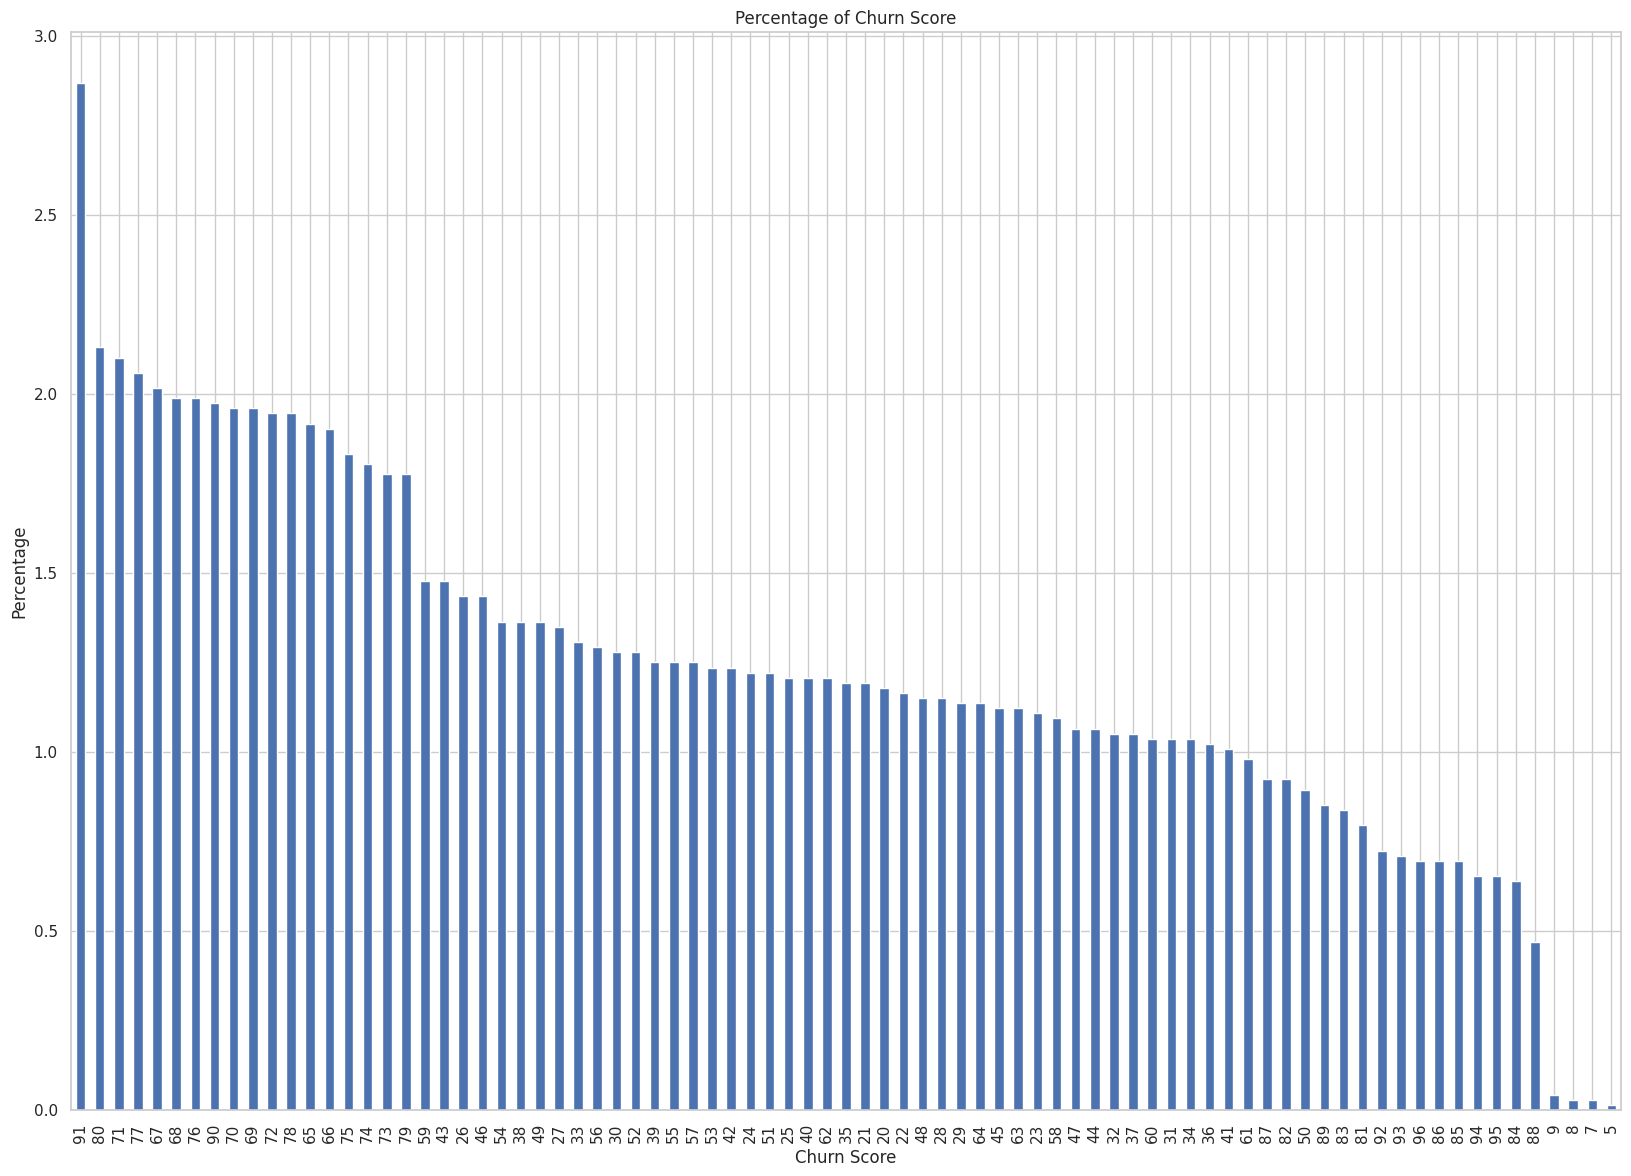

In [21]:
import matplotlib.pyplot as plt

# Calculate the counts of each unique 'Churn Score'
churn_score_counts = df['Churn Score'].value_counts()

# Calculate the percentage of each 'Churn Score'
percentage_churn_score = (churn_score_counts / churn_score_counts.sum()) * 100

# Create a bar plot
plt.figure(figsize=(20, 14))  # Optional: Set the figure size
percentage_churn_score.plot(kind='bar')
plt.xlabel('Churn Score')
plt.ylabel('Percentage')
plt.title('Percentage of Churn Score')
plt.show()


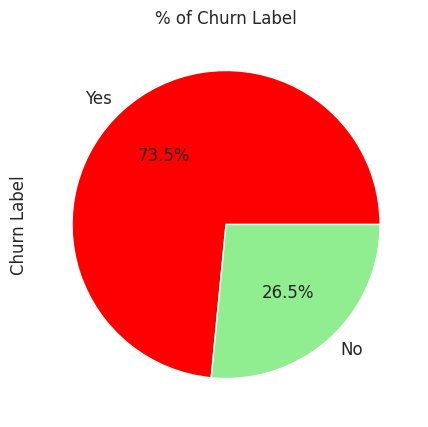

In [22]:
import matplotlib.pyplot as plt

# Calculate the percentage distribution of 'Churn Label'
percentage_distribution = (df['Churn Label'].value_counts() * 100.0 / len(df))

# Define the colors
colors = ['red', 'lightgreen']

# Create a pie chart with specified colors
ax = percentage_distribution.plot.pie(autopct='%.1f%%', labels=['Yes', 'No'], figsize=(5, 5), colors=colors, fontsize=12)

ax.set_ylabel('Churn Label', fontsize=12)
ax.set_title('% of Churn Label', fontsize=12)

plt.show()


In [23]:
# Convert 'Churn Label' column values to 1 for 'Yes' and 0 for 'No'
df.loc[df['Churn Label'] == 'No', 'Churn'] = 0
df.loc[df['Churn Label'] == 'Yes', 'Churn'] = 1

# Convert the 'Churn' column to integer
df['Churn'] = df['Churn'].astype('int32')


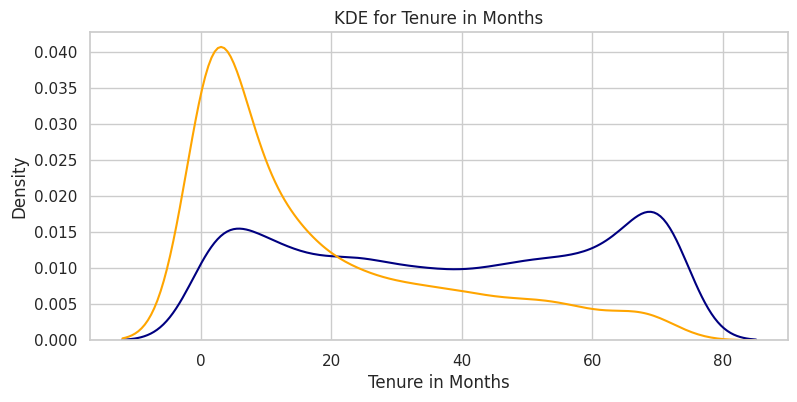

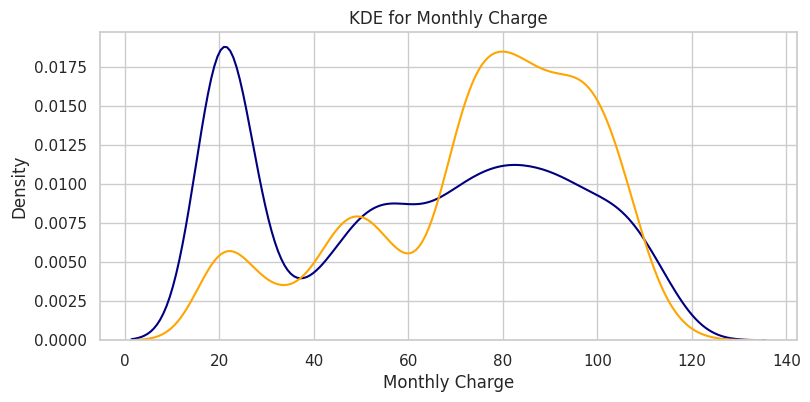

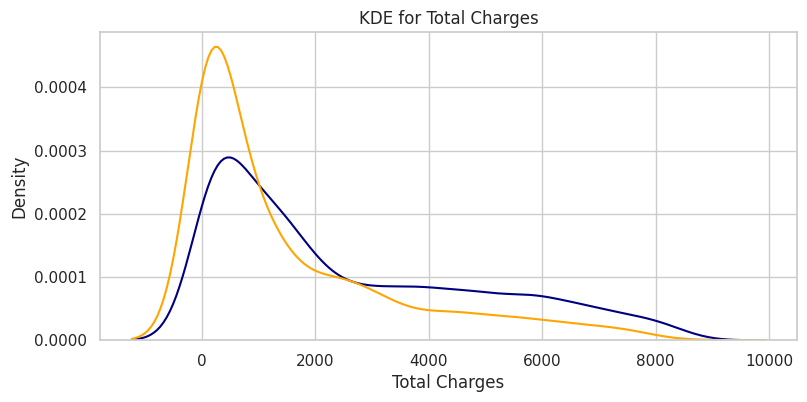

In [24]:
#There are only three numerical columns: tenure, monthly charges and total charges.
#The probability density distribution can be estimate using the seaborn kdeplot function.
def kdeplot(feature):
    plt.figure(figsize=(9, 4))
    plt.title("KDE for {}".format(feature))
    ax0 = sns.kdeplot(df[df['Churn'] == 0][feature], color= 'navy', label= 'Churn: No')
    ax1 = sns.kdeplot(df[df['Churn'] == 1][feature], color= 'orange', label= 'Churn: Yes')
kdeplot('Tenure in Months')
kdeplot('Monthly Charge')
kdeplot('Total Charges')

From the plots above we can conclude that:

Recent clients are more likely to churn.
Clients with higher MonthlyCharges are also more likely to churn.
Tenure and MonthlyCharges are probably important features.

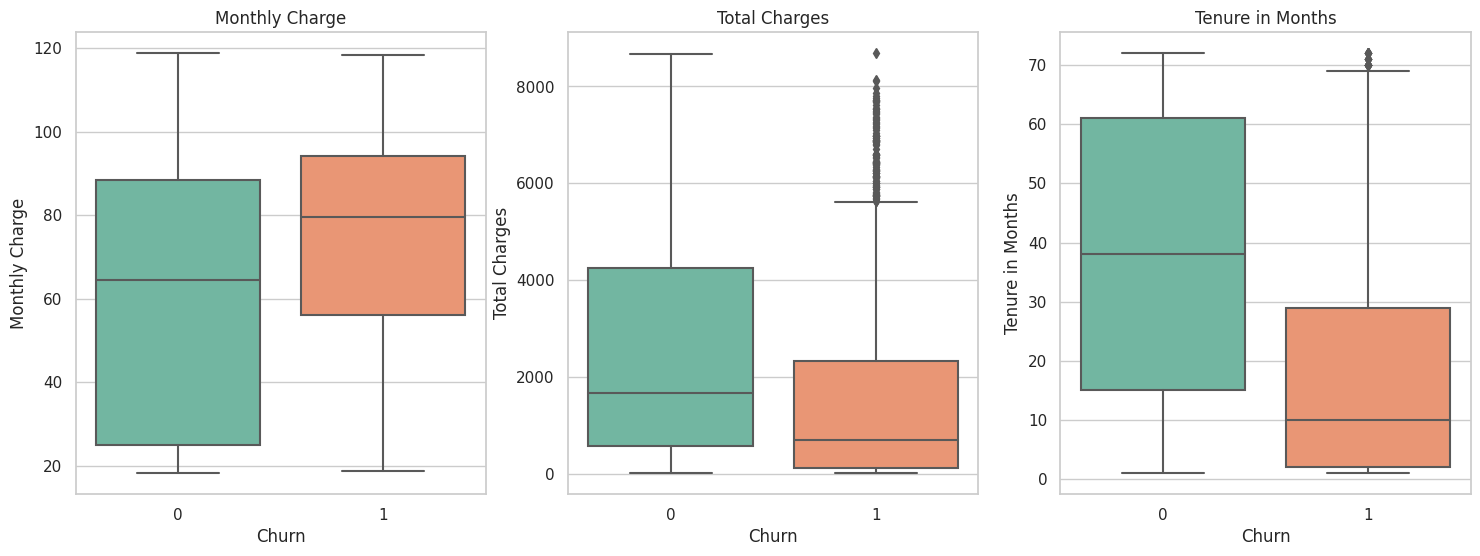

In [25]:
numerical = ["Monthly Charge", "Total Charges", "Tenure in Months"]

fig, ax = plt.subplots(1, 3, figsize=(18, 6))
for variable, subplot in zip(numerical, ax.flatten()):
    sns.boxplot(x=df["Churn"], y=df[variable], ax=subplot, palette = "Set2").set_title(str(variable))

The Monthly plan doesn't seem to be such a big driver of churn, but we can see that 75% of churners pay between 60 and 100 dollars a month
One important mark we can see in this plots that 50% of Churners leave the company before the first year goes by.

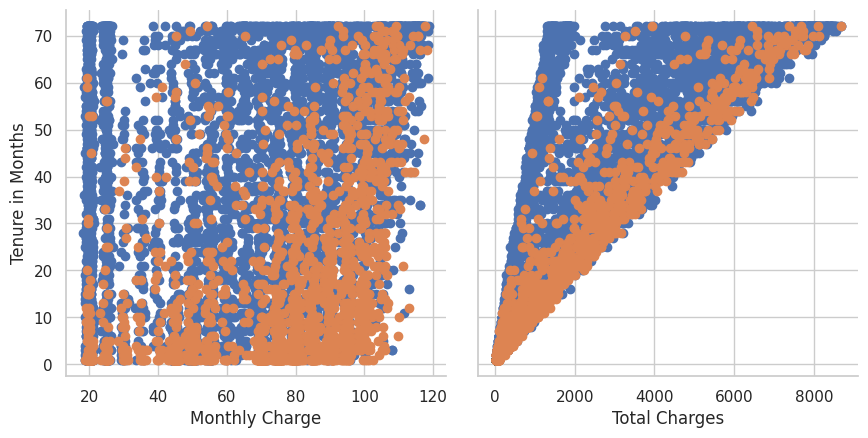

In [26]:
a=sns.PairGrid(df, y_vars=["Tenure in Months"], x_vars=["Monthly Charge", "Total Charges"], height=4.5, hue="Churn")
ax = a.map(plt.scatter)


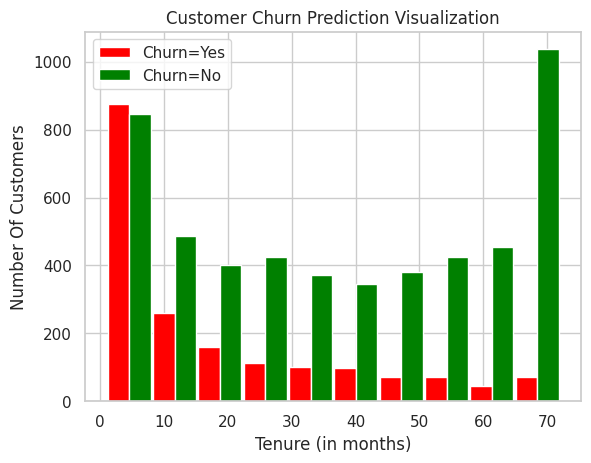

In [27]:

# Separate the data for 'Churn=Yes' and 'Churn=No'
tenure_churn_no = df[df['Churn Label'] == 'No']['Tenure in Months']
tenure_churn_yes = df[df['Churn Label'] == 'Yes']['Tenure in Months']

# Create a histogram
plt.xlabel("Tenure (in months)")
plt.ylabel("Number Of Customers")
plt.title("Customer Churn Prediction Visualization")

# Plot histograms for 'Churn=Yes' and 'Churn=No' with different colors
plt.hist([tenure_churn_yes, tenure_churn_no], rwidth=0.95, color=['red', 'green'], label=['Churn=Yes', 'Churn=No'])
plt.legend()

# Show the plot
plt.show()


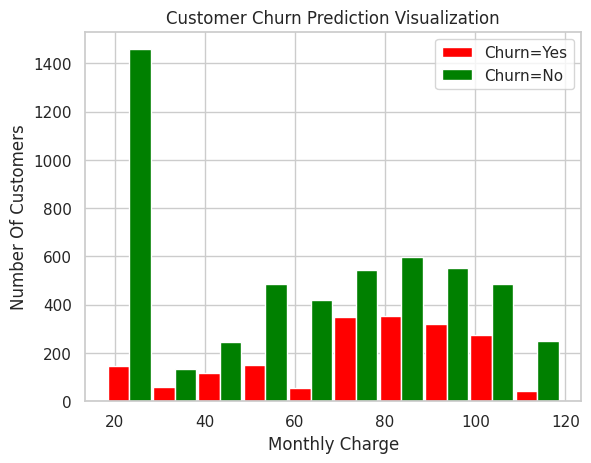

In [28]:
# Separate the data for 'Churn=Yes' and 'Churn=No'
monthcharge_no = df[df['Churn Label'] == 'No']['Monthly Charge']
monthcharge_yes = df[df['Churn Label'] == 'Yes']['Monthly Charge']

# Create a histogram
plt.xlabel("Monthly Charge")
plt.ylabel("Number Of Customers")
plt.title("Customer Churn Prediction Visualization")

# Plot histograms for 'Churn=Yes' and 'Churn=No' with different colors
plt.hist([monthcharge_yes, monthcharge_no], rwidth=0.95, color=['red', 'green'], label=['Churn=Yes', 'Churn=No'])
plt.legend()

# Show the plot
plt.show()


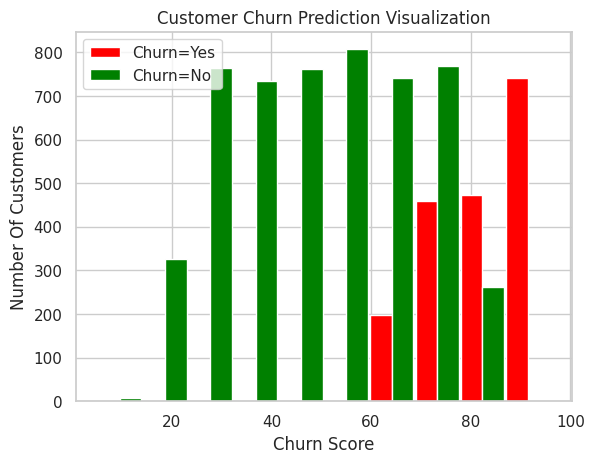

In [29]:
# Separate the data for 'Churn=Yes' and 'Churn=No'
churn_no = df[df['Churn Label'] == 'No']['Churn Score']
churn_yes = df[df['Churn Label'] == 'Yes']['Churn Score']

# Create a histogram
plt.xlabel("Churn Score")
plt.ylabel("Number Of Customers")
plt.title("Customer Churn Prediction Visualization")

# Plot histograms for 'Churn=Yes' and 'Churn=No' with different colors
plt.hist([churn_yes, churn_no], rwidth=0.95, color=['red', 'green'], label=['Churn=Yes', 'Churn=No'])
plt.legend()

# Show the plot
plt.show()

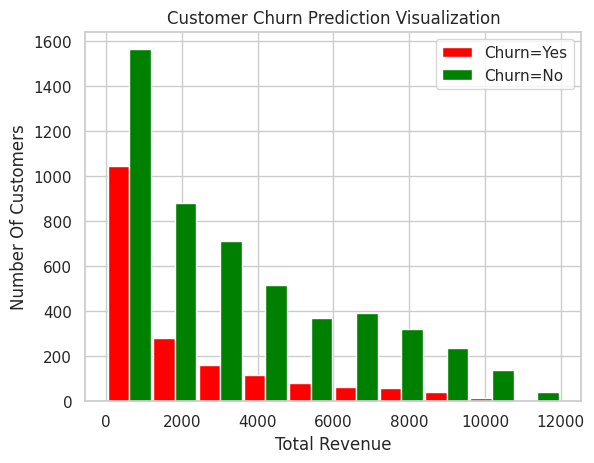

In [30]:
# Separate the data for 'Churn=Yes' and 'Churn=No'
revenue_no = df[df['Churn Label'] == 'No']['Total Revenue']
revenue_yes = df[df['Churn Label'] == 'Yes']['Total Revenue']

# Create a histogram
plt.xlabel("Total Revenue")
plt.ylabel("Number Of Customers")
plt.title("Customer Churn Prediction Visualization")

# Plot histograms for 'Churn=Yes' and 'Churn=No' with different colors
plt.hist([revenue_yes, revenue_no], rwidth=0.95, color=['red', 'green'], label=['Churn=Yes', 'Churn=No'])
plt.legend()

# Show the plot
plt.show()


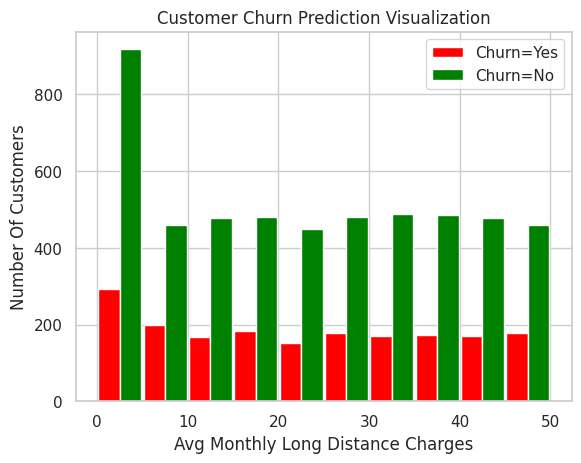

In [31]:
# Separate the data for 'Churn=Yes' and 'Churn=No'
averagemonthcharge_no = df[df['Churn Label'] == 'No']['Avg Monthly Long Distance Charges']
averagemonthcharge_yes = df[df['Churn Label'] == 'Yes']['Avg Monthly Long Distance Charges']

# Create a histogram
plt.xlabel("Avg Monthly Long Distance Charges")
plt.ylabel("Number Of Customers")
plt.title("Customer Churn Prediction Visualization")

# Plot histograms for 'Churn=Yes' and 'Churn=No' with different colors
plt.hist([averagemonthcharge_yes, averagemonthcharge_no], rwidth=0.95, color=['red', 'green'], label=['Churn=Yes', 'Churn=No'])
plt.legend()

# Show the plot
plt.show()

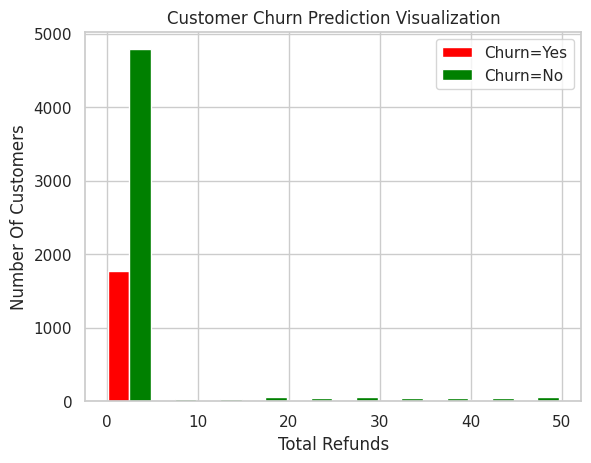

In [32]:
# Separate the data for 'Churn=Yes' and 'Churn=No'
totalrefund_no = df[df['Churn Label'] == 'No']['Total Refunds']
totalrefund_yes = df[df['Churn Label'] == 'Yes']['Total Refunds']

# Create a histogram
plt.xlabel("Total Refunds")
plt.ylabel("Number Of Customers")
plt.title("Customer Churn Prediction Visualization")

# Plot histograms for 'Churn=Yes' and 'Churn=No' with different colors
plt.hist([totalrefund_yes, totalrefund_no], rwidth=0.95, color=['red', 'green'], label=['Churn=Yes', 'Churn=No'])
plt.legend()

# Show the plot
plt.show()

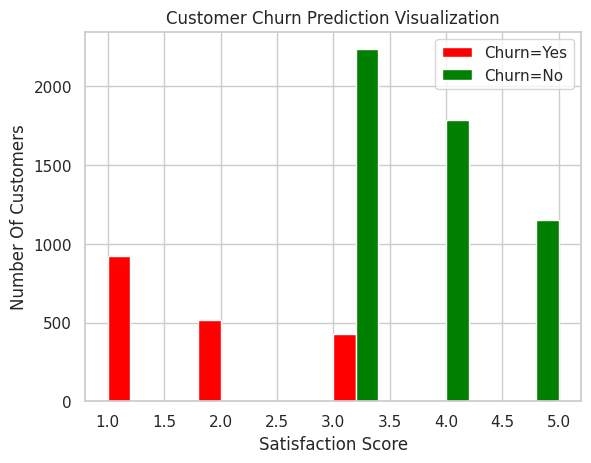

In [33]:
# Separate the data for 'Churn=Yes' and 'Churn=No'
satisfaction_no = df[df['Churn Label'] == 'No']['Satisfaction Score']
satisfaction_yes = df[df['Churn Label'] == 'Yes']['Satisfaction Score']

# Create a histogram
plt.xlabel("Satisfaction Score")
plt.ylabel("Number Of Customers")
plt.title("Customer Churn Prediction Visualization")

# Plot histograms for 'Churn=Yes' and 'Churn=No' with different colors
plt.hist([satisfaction_yes, satisfaction_no], rwidth=5, color=['red', 'green'], label=['Churn=Yes', 'Churn=No'])
plt.legend()

# Show the plot
plt.show()

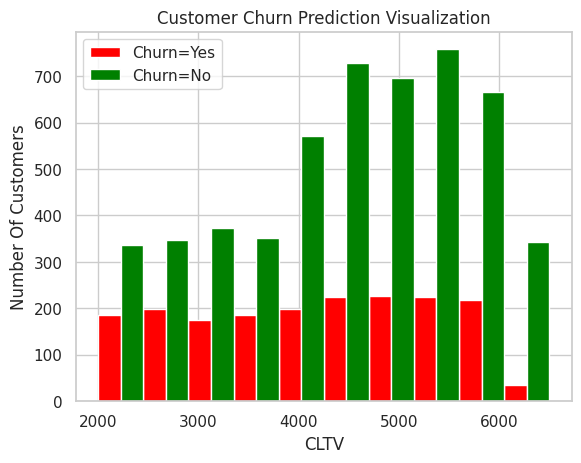

In [34]:
# Separate the data for 'Churn=Yes' and 'Churn=No'
cltv_no = df[df['Churn Label'] == 'No']['CLTV']
cltv_yes = df[df['Churn Label'] == 'Yes']['CLTV']

# Create a histogram
plt.xlabel("CLTV")
plt.ylabel("Number Of Customers")
plt.title("Customer Churn Prediction Visualization")

# Plot histograms for 'Churn=Yes' and 'Churn=No' with different colors
plt.hist([cltv_yes, cltv_no], rwidth=5, color=['red', 'green'], label=['Churn=Yes', 'Churn=No'])
plt.legend()

# Show the plot
plt.show()

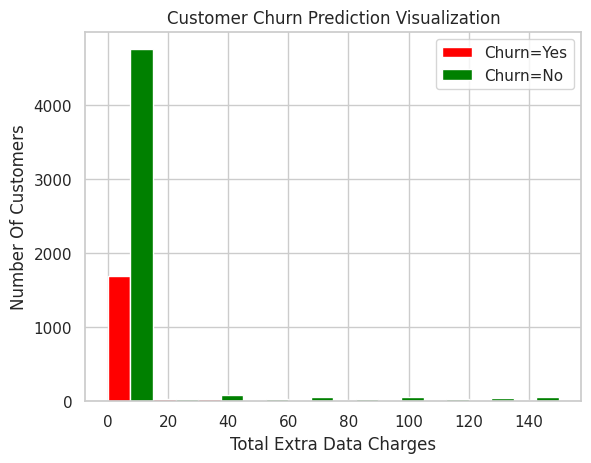

In [35]:
# Separate the data for 'Churn=Yes' and 'Churn=No'
totalextracharge_no = df[df['Churn Label'] == 'No']['Total Extra Data Charges']
totalextracharge_yes = df[df['Churn Label'] == 'Yes']['Total Extra Data Charges']

# Create a histogram
plt.xlabel("Total Extra Data Charges")
plt.ylabel("Number Of Customers")
plt.title("Customer Churn Prediction Visualization")

# Plot histograms for 'Churn=Yes' and 'Churn=No' with different colors
plt.hist([totalextracharge_yes, totalextracharge_no], rwidth=5, color=['red', 'green'], label=['Churn=Yes', 'Churn=No'])
plt.legend()

# Show the plot
plt.show()

##Unique Values

In [36]:
def print_unique_col_values(df):
       for column in df:
            if df[column].dtypes=='object':
                print(f'{column}: {df[column].unique()}')

In [37]:
print_unique_col_values(df)


Gender: ['Male' 'Female']
Under 30: ['No' 'Yes']
Senior Citizen: ['Yes' 'No']
Married: ['No' 'Yes']
Dependents: ['No' 'Yes']
Referred a Friend: ['No' 'Yes']
Phone Service: ['No' 'Yes']
Multiple Lines: ['No' 'Yes']
Internet Service: ['Yes' 'No']
Internet Type: ['DSL' 'Fiber Optic' 'Cable' 'None']
Online Security: ['No' 'Yes']
Online Backup: ['No' 'Yes']
Device Protection Plan: ['Yes' 'No']
Premium Tech Support: ['No' 'Yes']
Streaming TV: ['No' 'Yes']
Streaming Movies: ['Yes' 'No']
Streaming Music: ['No' 'Yes']
Unlimited Data: ['No' 'Yes']
Contract: ['Month-to-Month' 'Two Year' 'One Year']
Paperless Billing: ['Yes' 'No']
Payment Method: ['Bank Withdrawal' 'Credit Card' 'Mailed Check']
Churn Label: ['Yes' 'No']
Churn Category: ['Competitor' nan 'Dissatisfaction' 'Attitude' 'Price' 'Other']
Churn Reason: ['Competitor offered more data' nan 'Competitor made better offer'
 'Service dissatisfaction' 'Limited range of services'
 'Attitude of support person' 'Extra data charges'
 'Competitor ha

In [38]:
import pandas as pd

# Assuming df contains your data

# Create a cross-tabulation table
cross_tab = pd.crosstab(df['Churn Category'], df['Churn Reason'], normalize='index') * 100

# You can round the percentages to a specific number of decimal places if needed
cross_tab = cross_tab.round(2)

print(cross_tab)



Churn Reason     Attitude of service provider  Attitude of support person  \
Churn Category                                                              
Attitude                                29.94                       70.06   
Competitor                               0.00                        0.00   
Dissatisfaction                          0.00                        0.00   
Other                                    0.00                        0.00   
Price                                    0.00                        0.00   

Churn Reason     Competitor had better devices  Competitor made better offer  \
Churn Category                                                                 
Attitude                                  0.00                          0.00   
Competitor                               37.22                         36.98   
Dissatisfaction                           0.00                          0.00   
Other                                     0.00              

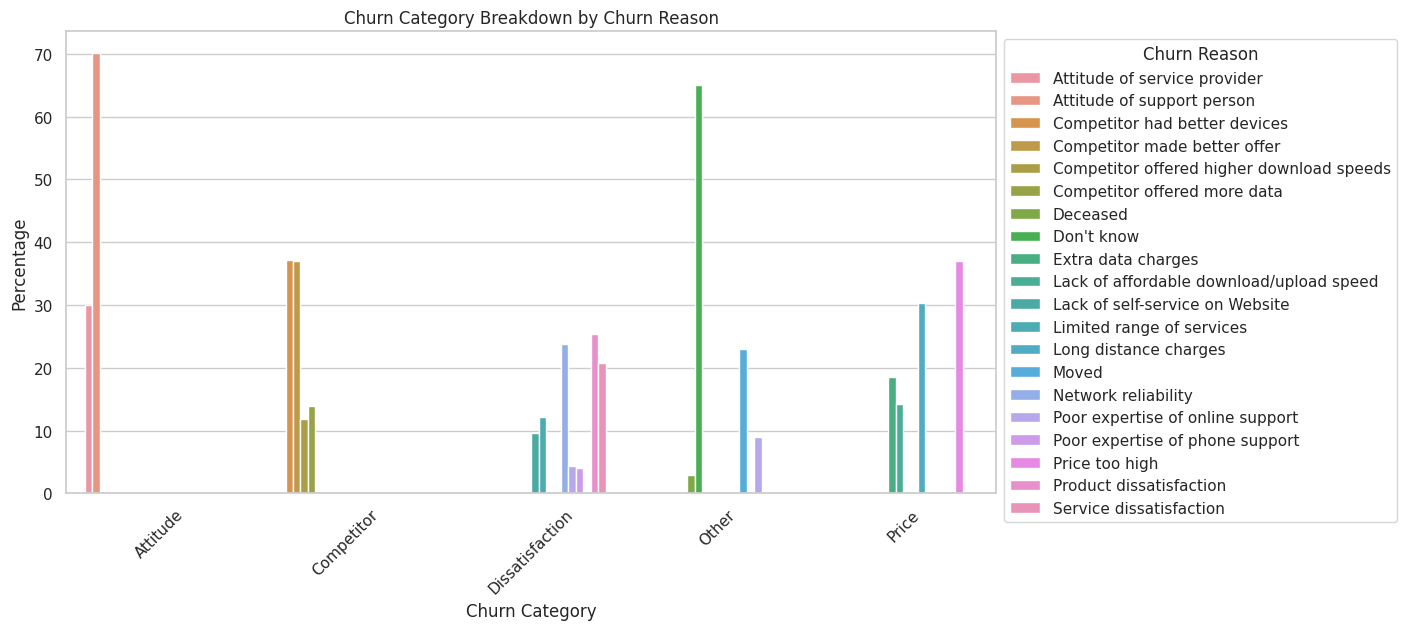

In [39]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Assuming df contains your data and the percentages are calculated as shown in the previous responses

# Create a DataFrame for plotting
plot_df = cross_tab.stack().reset_index()
plot_df.columns = ['Churn Category', 'Churn Reason', 'Percentage']

# Create a stacked bar chart
sns.set(style="whitegrid")
plt.figure(figsize=(12, 6))

# Define the order of Churn Categories and Churn Reasons for proper stacking
category_order = plot_df['Churn Category'].unique()
reason_order = plot_df['Churn Reason'].unique()

# Plot the stacked bar chart
sns.barplot(x="Churn Category", y="Percentage", hue="Churn Reason", data=plot_df,
            order=category_order, hue_order=reason_order)

# Customize the plot
plt.ylabel("Percentage")
plt.title("Churn Category Breakdown by Churn Reason")
plt.legend(title="Churn Reason", bbox_to_anchor=(1, 1), loc='upper left')
plt.xticks(rotation=45)

plt.show()


##Categorical

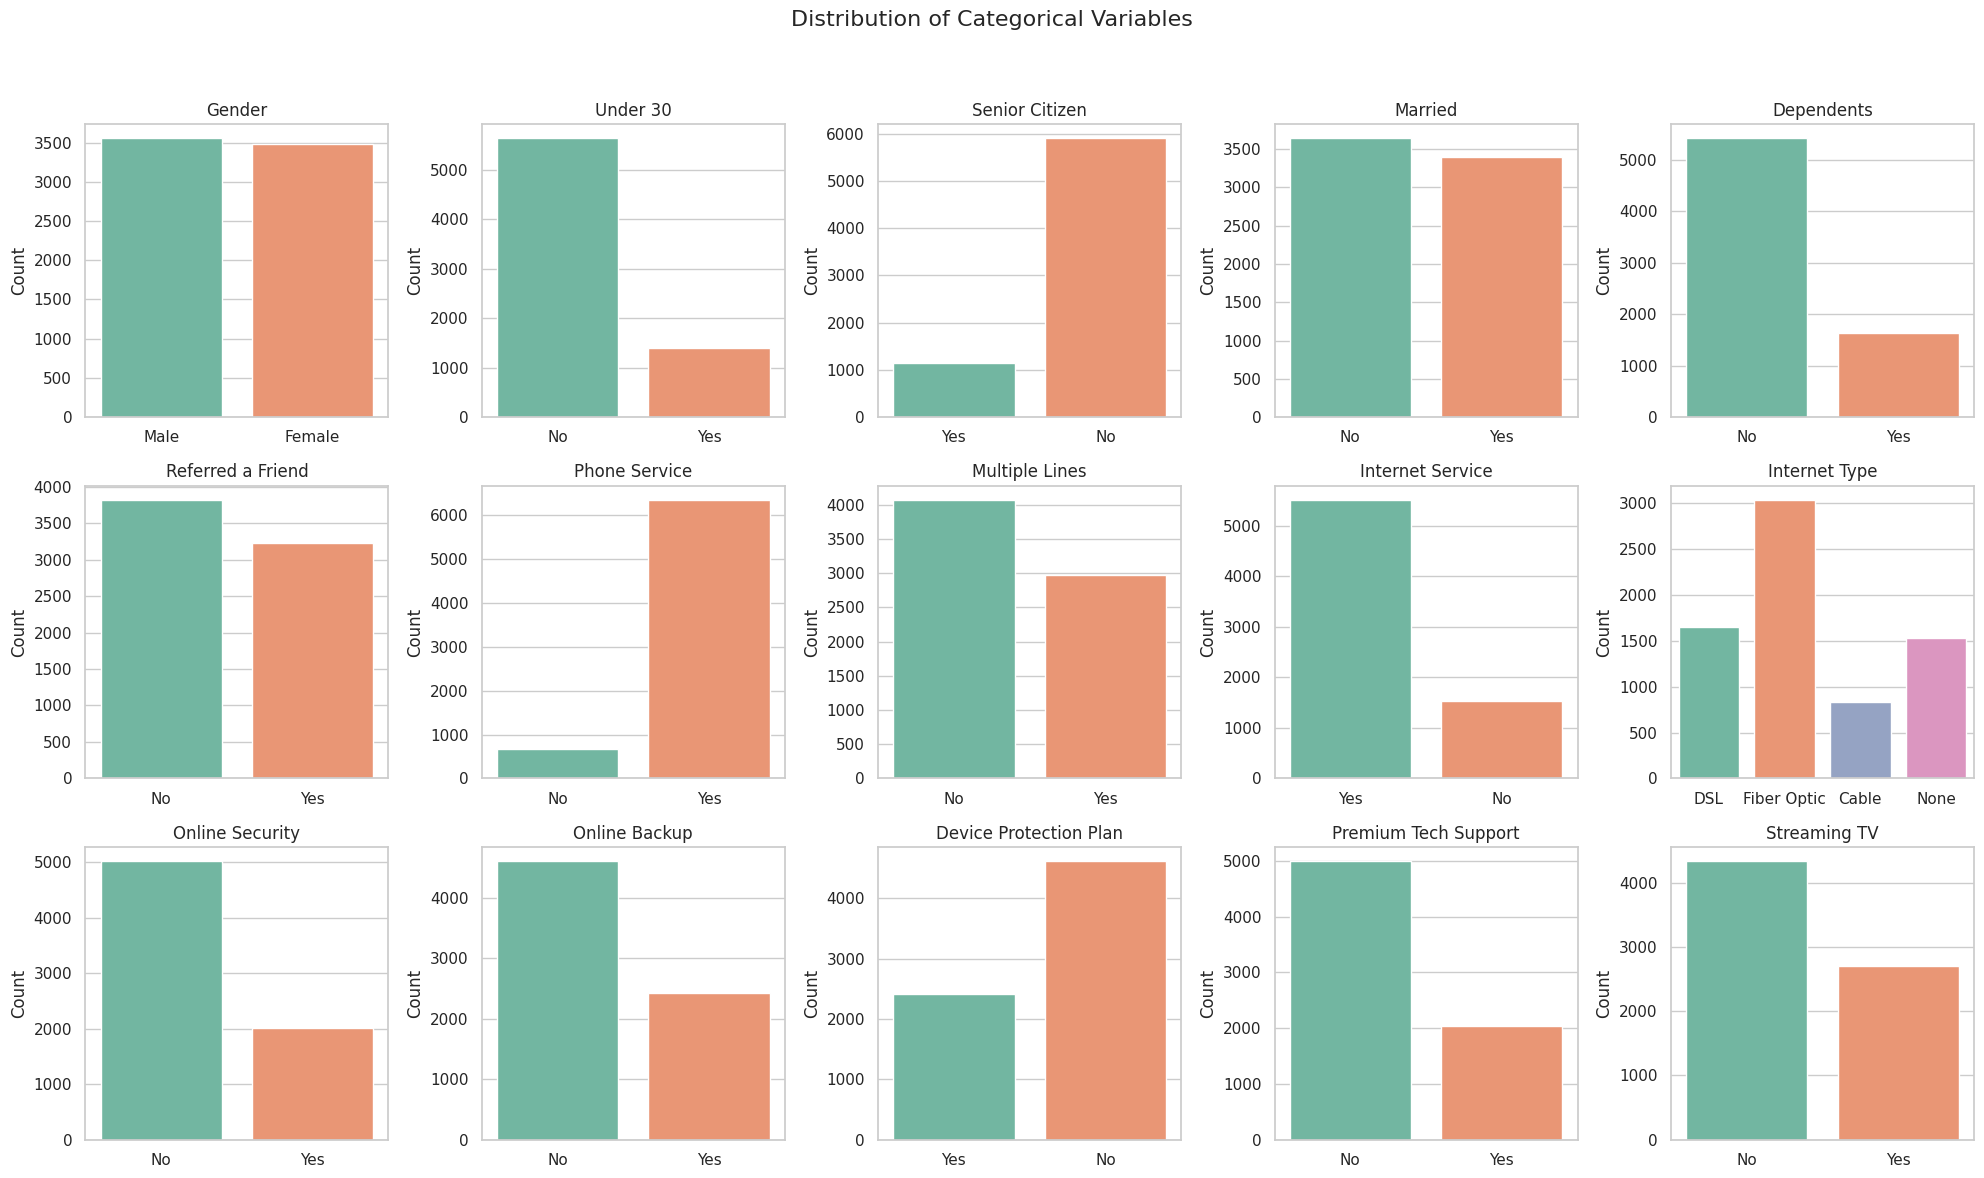

In [40]:
import matplotlib.pyplot as plt
import seaborn as sns

categorical = ['Gender', 'Under 30', 'Senior Citizen', 'Married', 'Dependents',
       'Referred a Friend', 'Phone Service', 'Multiple Lines',
       'Internet Service', 'Internet Type', 'Online Security', 'Online Backup',
       'Device Protection Plan', 'Premium Tech Support', 'Streaming TV',
       'Streaming Movies', 'Streaming Music', 'Unlimited Data', 'Contract',
       'Paperless Billing', 'Payment Method', 'Churn Label', 'Churn Category',
       'Churn Reason']

fig, ax = plt.subplots(3, 5, figsize=(20, 12))
fig.suptitle('Distribution of Categorical Variables', fontsize=16)

for variable, subplot in zip(categorical, ax.flatten()):
    sns.countplot(data=df, x=variable, ax=subplot, palette="Set2")
    subplot.set_title(variable)
    subplot.set_xlabel('')
    subplot.set_ylabel('Count')

plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()


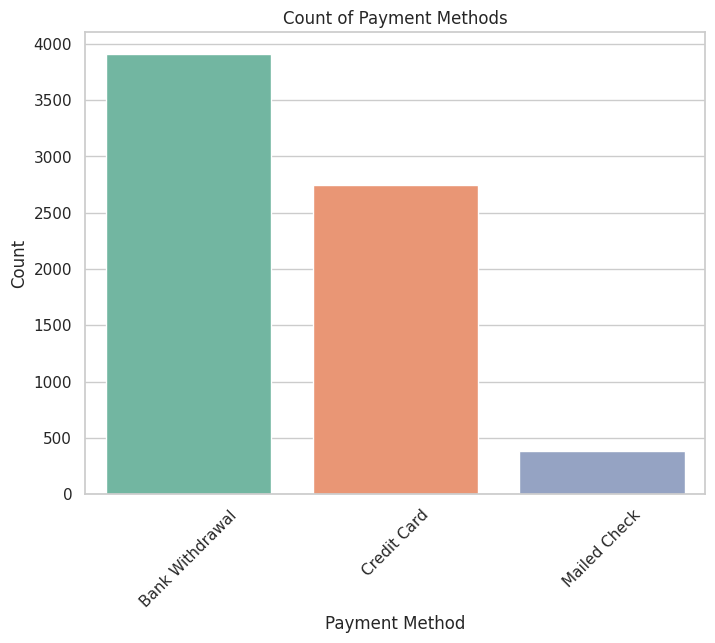

In [41]:

plt.figure(figsize=(8, 6))
chart = sns.countplot(data=df, x="Payment Method", palette="Set2")
chart.set_xticklabels(chart.get_xticklabels(), rotation=45)
plt.xlabel("Payment Method")
plt.ylabel("Count")
plt.title("Count of Payment Methods")
plt.show()


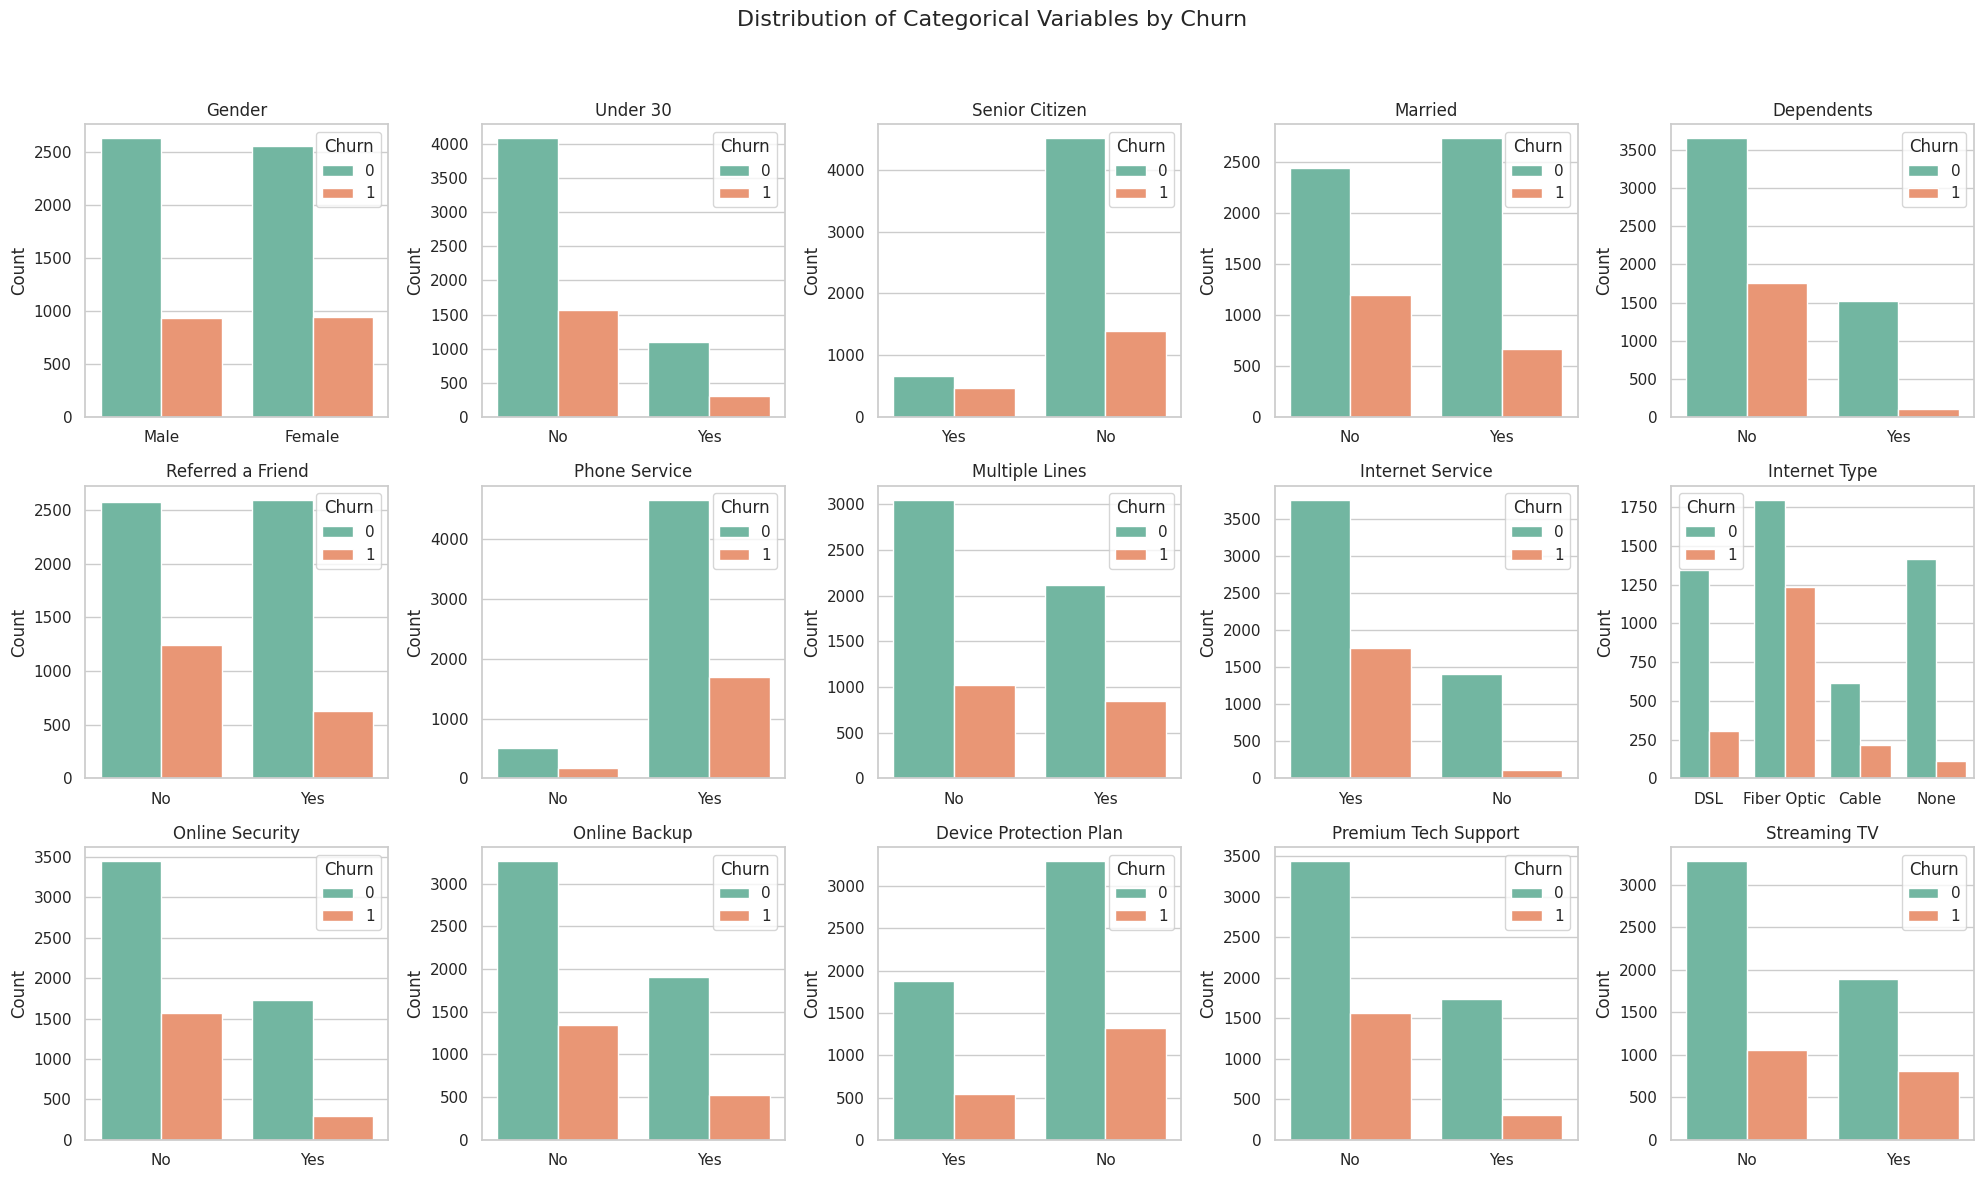

In [42]:

categorical = ['Gender', 'Under 30', 'Senior Citizen', 'Married', 'Dependents',
       'Referred a Friend', 'Phone Service', 'Multiple Lines',
       'Internet Service', 'Internet Type', 'Online Security', 'Online Backup',
       'Device Protection Plan', 'Premium Tech Support', 'Streaming TV',
       'Streaming Movies', 'Streaming Music', 'Unlimited Data', 'Contract',
       'Paperless Billing', 'Payment Method', 'Churn Label', 'Churn Category',
       'Churn Reason']

fig, ax = plt.subplots(3, 5, figsize=(20, 12))
fig.suptitle('Distribution of Categorical Variables by Churn', fontsize=16)

for variable, subplot in zip(categorical, ax.flatten()):
    sns.countplot(data=df, x=variable, hue="Churn", ax=subplot, palette="Set2")
    subplot.set_title(variable)
    subplot.set_xlabel('')
    subplot.set_ylabel('Count')

plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()


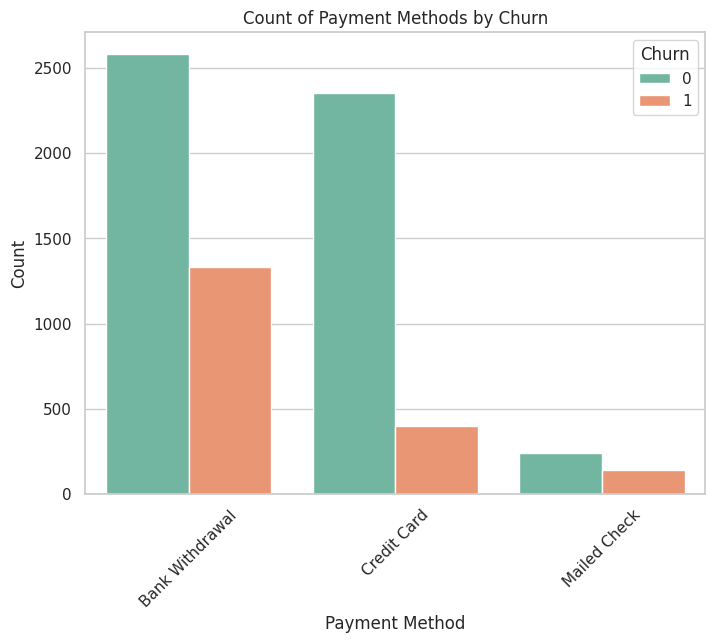

In [43]:


plt.figure(figsize=(8, 6))
chart = sns.countplot(data=df, x="Payment Method", hue="Churn", palette="Set2")
chart.set_xticklabels(chart.get_xticklabels(), rotation=45)
plt.xlabel("Payment Method")
plt.ylabel("Count")
plt.title("Count of Payment Methods by Churn")
plt.show()


In [44]:
## phone service, multiple lines, internet service
display(pd.crosstab(df['Churn'], [df['Phone Service'], df['Multiple Lines'], df['Internet Service']], dropna=False))

Phone Service    No                Yes                 
Multiple Lines   No      Yes        No        Yes      
Internet Service No  Yes  No Yes    No   Yes   No   Yes
Churn                                                  
0                 0  512   0   0  1081  1460  332  1789
1                 0  170   0   0   103   746   10   840

In [45]:
## phone service, internet service, seniorcitizen
crosstab_cols = [df['Phone Service'], df['Senior Citizen'], df['Internet Service']]
display(pd.crosstab(df['Churn'], crosstab_cols, dropna=False))

Phone Service    No                Yes               
Senior Citizen   No      Yes        No       Yes     
Internet Service No  Yes  No Yes    No   Yes  No  Yes
Churn                                                
0                 0  452   0  60  1366  2690  47  559
1                 0  126   0  44   108  1159   5  427

In [46]:
## phone service, internet service, gender
crosstab_cols = [df['Phone Service'], df['Gender'], df['Internet Service']]
display(pd.crosstab(df['Churn'], crosstab_cols, dropna=False))

Phone Service        No                   Yes                 
Gender           Female      Male      Female       Male      
Internet Service     No  Yes   No  Yes     No   Yes   No   Yes
Churn                                                         
0                     0  251    0  261    691  1607  722  1642
1                     0   80    0   90     56   803   57   783

In [47]:
## internet service, streamingtv, streamingmovies
crosstab_cols = [df['Streaming TV'], df['Streaming Movies'], df['Internet Service']]
display(pd.crosstab(df['Churn'], crosstab_cols))

Streaming TV        No             Yes      
Streaming Movies    No        Yes   No   Yes
Internet Service    No   Yes  Yes  Yes   Yes
Churn                                       
0                 1413  1323  545  524  1369
1                  113   695  247  243   571

In [48]:
#contract & internet service
crosstab_cols = [df['Contract'],df['Internet Service']]
display(pd.crosstab(df['Churn'], crosstab_cols))

Contract         Month-to-Month       One Year       Two Year      
Internet Service             No   Yes       No   Yes       No   Yes
Churn                                                              
0                           419  1536      357  1027      637  1198
1                            99  1556        9   157        5    43

##Check for Outliers in Numerical Features

In [49]:
num_features= ['Tenure in Months', 'Avg Monthly Long Distance Charges',
       'Monthly Charge', 'Total Charges', 'Total Refunds',
       'Total Extra Data Charges', 'Total Long Distance Charges',
       'Total Revenue', 'Satisfaction Score', 'Churn Score', 'CLTV']
df_num = df[num_features]
df_num.describe()

Q1 = df_num.quantile(0.25)
Q3 = df_num.quantile(0.75)
IQR = Q3 - Q1
IQR
((df_num < (Q1 - 1.5 * IQR)) | (df_num > (Q3 + 1.5 * IQR))).any()

Tenure in Months                     False
Avg Monthly Long Distance Charges    False
Monthly Charge                       False
Total Charges                        False
Total Refunds                         True
Total Extra Data Charges              True
Total Long Distance Charges           True
Total Revenue                         True
Satisfaction Score                    True
Churn Score                          False
CLTV                                 False
dtype: bool

##Feature Engineering

In [50]:

correlation_coefficient = np.corrcoef(df['Total Charges'], df['Monthly Charge'] * df['Tenure in Months'])
print(correlation_coefficient)


[[1.         0.99956033]
 [0.99956033 1.        ]]


high correlation between Total Charges and Monthly Charge we can drop total charges

##Statistical

In [51]:
# Check the descriptive statistics of numeric variables
df.describe()

Tenure in Months  Avg Monthly Long Distance Charges  Monthly Charge  \
count       7043.000000                        7043.000000     7043.000000   
mean          32.386767                          22.958954       64.761692   
std           24.542061                          15.448113       30.090047   
min            1.000000                           0.000000       18.250000   
25%            9.000000                           9.210000       35.500000   
50%           29.000000                          22.890000       70.350000   
75%           55.000000                          36.395000       89.850000   
max           72.000000                          49.990000      118.750000   

       Total Charges  Total Refunds  Total Extra Data Charges  \
count    7043.000000    7043.000000               7043.000000   
mean     2280.381264       1.962182                  6.860713   
std      2266.220462       7.902614                 25.104978   
min        18.800000       0.000000                  0.000000   
25%       400.150000       0.000000                  0.000000   
50%      1394.550000       0.000000                  0.000000   
75%      3786.600000       0.000000                  0.000000   
max      8684.800000      49.790000                150.000000   

       Total Long Distance Charges  Total Revenue  Satisfaction Score  \
count                  7043.000000    7043.000000         7043.000000   
mean                    749.099262    3034.379056            3.244924   
std                     846.660055    2865.204542            1.201657   
min                       0.000000      21.360000            1.000000   
25%                      70.545000     605.610000            3.000000   
50%                     401.440000    2108.640000            3.000000   
75%                    1191.100000    4801.145000            4.000000   
max                    3564.720000   11979.340000            5.000000   

       Churn Score         CLTV        Churn  
count  7043.000000  7043.000000  7043.000000  
mean     58.505040  4400.295755     0.265370  
std      21.170031  1183.057152     0.441561  
min       5.000000  2003.000000     0.000000  
25%      40.000000  3469.000000     0.000000  
50%      61.000000  4527.000000     0.000000  
75%      75.500000  5380.500000     1.000000  
max      96.000000  6500.000000     1.000000

75% customers have tenure less than 55 months.

Average Monthly charges are USD 64.76 whereas 25% customers pay more than USD 89.85 per month

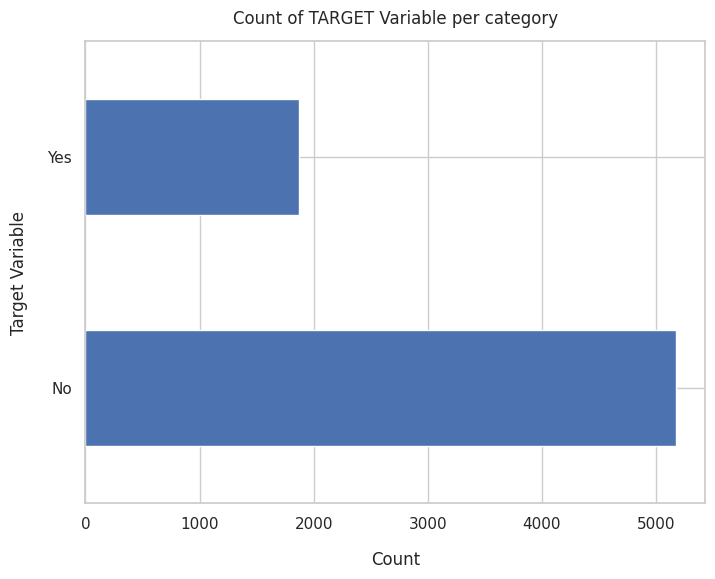

In [52]:
df['Churn Label'].value_counts().plot(kind='barh', figsize=(8, 6))
plt.xlabel("Count", labelpad=14)
plt.ylabel("Target Variable", labelpad=14)
plt.title("Count of TARGET Variable per category", y=1.02);

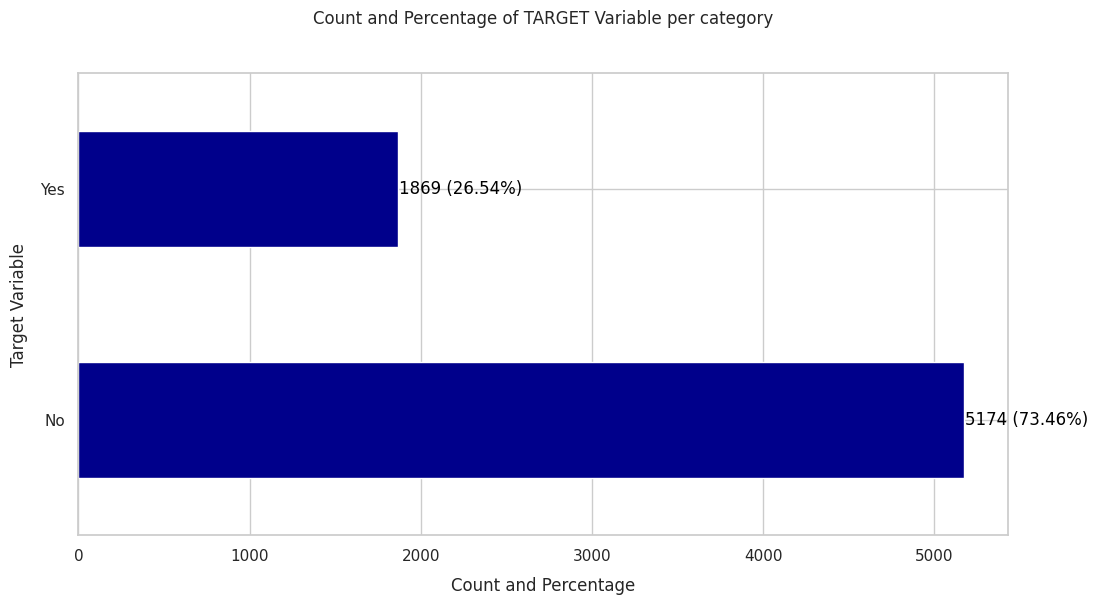

In [53]:

# Calculate the count and percentage of each category
value_counts = df['Churn Label'].value_counts()
total_samples = len(df)
percentages = (value_counts / total_samples) * 100

# Create a horizontal bar chart with both count and percentage
plt.figure(figsize=(12, 6))
ax = value_counts.plot(kind='barh', color='darkblue')

# Add the percentages as labels
for i, v in enumerate(value_counts):
    ax.text(v + 2, i, f'{v} ({percentages[i]:.2f}%)', color='black', va='center')

# Set labels and title
plt.xlabel("Count and Percentage", labelpad=9)
plt.ylabel("Target Variable", labelpad=9)
plt.title("Count and Percentage of TARGET Variable per category", y=1.09)

# Display the plot
plt.show()


In [54]:
# Come up with your favorite color combination
colors = ["#51C1C8", "#E96279", "#44A2D6", "#536D84",
         "#51C1C8", "#E96279", "#44A2D6", "#536D84"]

## User group statistical analysis
+ Gender, age group, whether you have a partner, guardian status



### Gender distribution

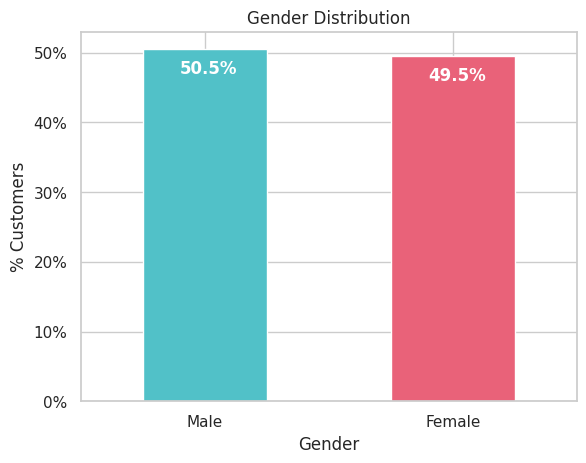

In [55]:
ax = (df['Gender'].value_counts()*100/len(df)).plot(kind='bar',
                                                                       stacked=True,
                                                                       rot=0,
                                                                       color = colors)
ax.yaxis.set_major_formatter(mtick.PercentFormatter())
ax.set_ylabel('% Customers')
ax.set_xlabel('Gender')
ax.set_ylabel('% Customers')
ax.set_title('Gender Distribution')

totals = [i.get_width() for i in ax.patches]
total = sum(totals)

for i in ax.patches:
    # get_width pulls left or right; get_y pushes up or down
    ax.text(i.get_x()+.15, i.get_height()-3.5, \
            str(round((i.get_height()/total), 1))+'%',
            fontsize=12,
            color='white',
           weight = 'bold')

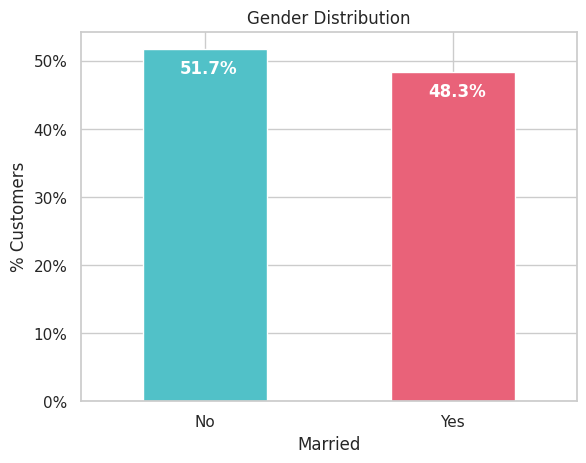

In [56]:
ax = (df['Married'].value_counts()*100/len(df)).plot(kind='bar',
                                                                       stacked=True,
                                                                       rot=0,
                                                                       color = colors)
ax.yaxis.set_major_formatter(mtick.PercentFormatter())
ax.set_ylabel('% Customers')
ax.set_xlabel('Married')
ax.set_ylabel('% Customers')
ax.set_title('Gender Distribution')

totals = [i.get_width() for i in ax.patches]
total = sum(totals)

for i in ax.patches:
    # get_width pulls left or right; get_y pushes up or down
    ax.text(i.get_x()+.15, i.get_height()-3.5, \
            str(round((i.get_height()/total), 1))+'%',
            fontsize=12,
            color='white',
           weight = 'bold')

### Are you a retiree? Senior Citizens

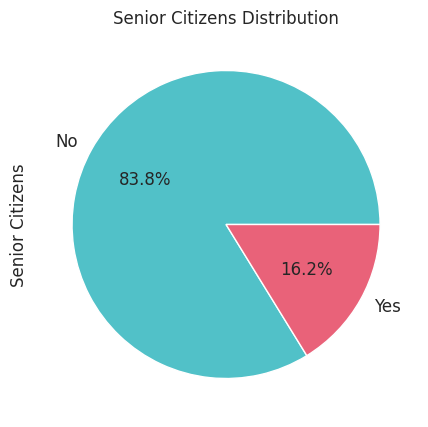

In [57]:
ax = (df['Senior Citizen'].value_counts()*100.0 /len(df)).plot.pie(autopct='%.1f%%', labels = ['No', 'Yes'],figsize =(5,5), fontsize = 12,colors=colors)
ax.yaxis.set_major_formatter(mtick.PercentFormatter())
ax.set_ylabel('Senior Citizens',fontsize = 12)
ax.set_title('Senior Citizens Distribution', fontsize = 12);

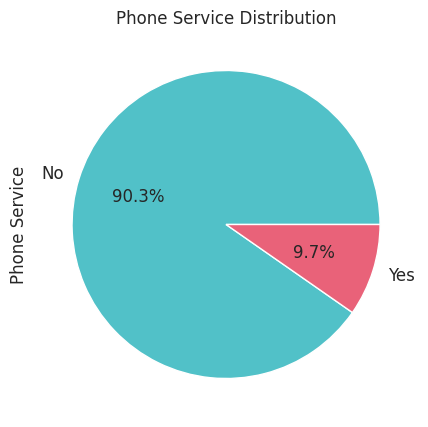

In [58]:
ax = (df['Phone Service'].value_counts()*100.0 /len(df)).plot.pie(autopct='%.1f%%', labels = ['No', 'Yes'],figsize =(5,5), fontsize = 12,colors=colors)
ax.yaxis.set_major_formatter(mtick.PercentFormatter())
ax.set_ylabel('Phone Service',fontsize = 12)
ax.set_title('Phone Service Distribution', fontsize = 12);

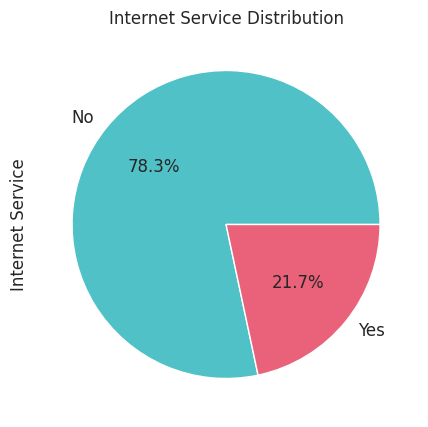

In [59]:
ax = (df['Internet Service'].value_counts()*100.0 /len(df)).plot.pie(autopct='%.1f%%', labels = ['No', 'Yes'],figsize =(5,5), fontsize = 12,colors=colors)
ax.yaxis.set_major_formatter(mtick.PercentFormatter())
ax.set_ylabel('Internet Service',fontsize = 12)
ax.set_title('Internet Service Distribution', fontsize = 12);

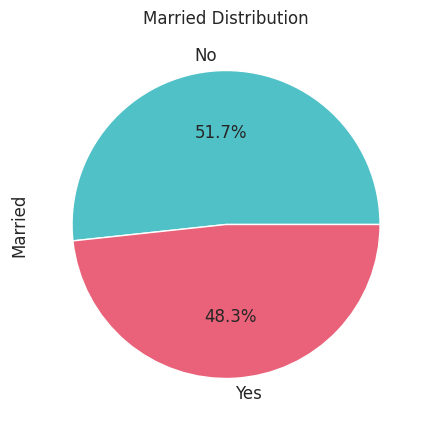

In [60]:
ax = (df['Married'].value_counts()*100.0 /len(df)).plot.pie(autopct='%.1f%%', labels = ['No', 'Yes'],figsize =(5,5), fontsize = 12,colors=colors)
ax.yaxis.set_major_formatter(mtick.PercentFormatter())
ax.set_ylabel('Married',fontsize = 12)
ax.set_title('Married Distribution', fontsize = 12);

In [61]:
100*df['Churn Label'].value_counts()/len(df['Churn Label'])


No     73.463013
Yes    26.536987
Name: Churn Label, dtype: float64

In [62]:
df['Churn Label'].value_counts()


No     5174
Yes    1869
Name: Churn Label, dtype: int64

Data is highly imbalanced, ratio = 73:27
So we analyse the data with other features while taking the target values separately to get some insights.

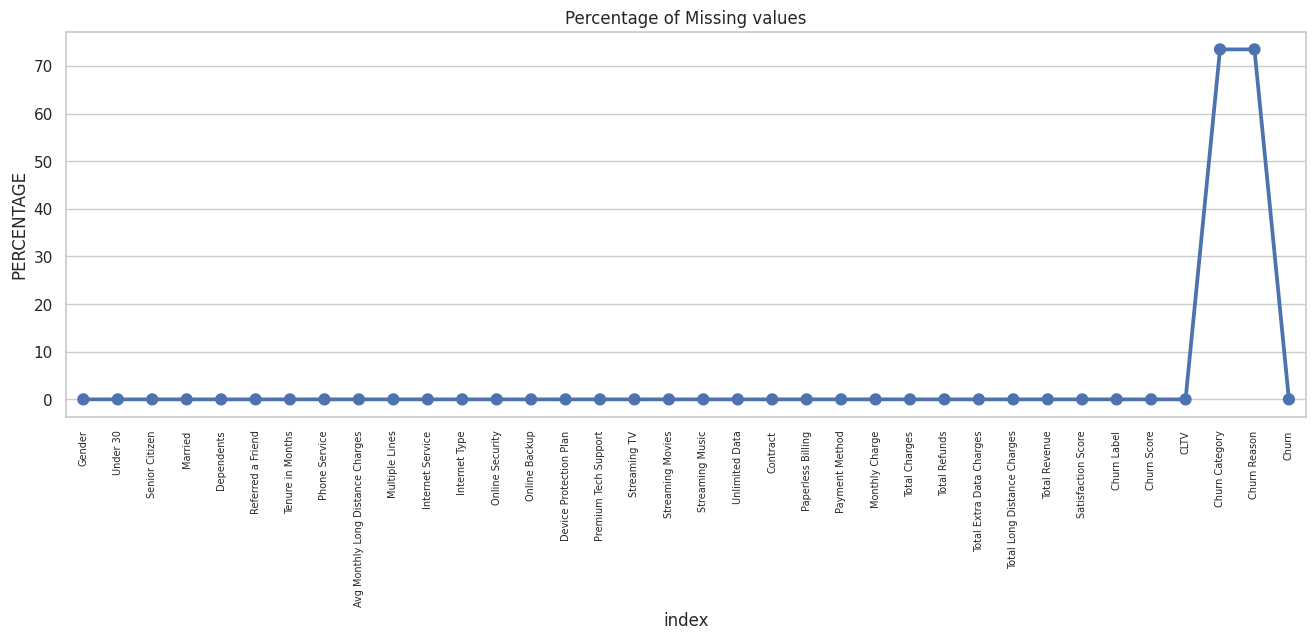

In [63]:
missing = pd.DataFrame((df.isnull().sum()) * 100 / df.shape[0]).reset_index()

plt.figure(figsize=(16, 5))
ax = sns.pointplot(x='index', y=0, data=missing)
plt.xticks(rotation=90, fontsize=7)
plt.title("Percentage of Missing values")
plt.ylabel("PERCENTAGE")
plt.show()

Divide customers into bins based on tenure e.g. for tenure < 12 months: assign a tenure group if 1-12, for tenure between 1 to 2 Yrs, tenure group of 13-24; so on...

In [64]:
# Get the max tenure
print(df['Tenure in Months'].max()) #72

72


In [65]:
# Group the tenure in bins of 12 months
labels = ["{0} - {1}".format(i, i + 11) for i in range(1, 72, 12)]

df['tenure_group'] = pd.cut(df['Tenure in Months'], range(1, 80, 12), right=False, labels=labels)


In [66]:
df['tenure_group'].value_counts()


1 - 12     2186
61 - 72    1407
13 - 24    1024
25 - 36     832
49 - 60     832
37 - 48     762
Name: tenure_group, dtype: int64

In [67]:
#drop column customerID and tenure
#df.drop(columns= ['Tenure in Months'], axis=1, inplace=True)
#df.head()

Data Exploration

Plot distibution of individual predictors by churn

In [68]:
# Concise Summary of the dataframe, as we have too many columns, we are using the verbose = True mode
df.info(verbose = True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 37 columns):
 #   Column                             Non-Null Count  Dtype   
---  ------                             --------------  -----   
 0   Gender                             7043 non-null   object  
 1   Under 30                           7043 non-null   object  
 2   Senior Citizen                     7043 non-null   object  
 3   Married                            7043 non-null   object  
 4   Dependents                         7043 non-null   object  
 5   Referred a Friend                  7043 non-null   object  
 6   Tenure in Months                   7043 non-null   int64   
 7   Phone Service                      7043 non-null   object  
 8   Avg Monthly Long Distance Charges  7043 non-null   float64 
 9   Multiple Lines                     7043 non-null   object  
 10  Internet Service                   7043 non-null   object  
 11  Internet Type                      7043 non

In [69]:
df_columns = df.columns.values
df_columns

array(['Gender', 'Under 30', 'Senior Citizen', 'Married', 'Dependents',
       'Referred a Friend', 'Tenure in Months', 'Phone Service',
       'Avg Monthly Long Distance Charges', 'Multiple Lines',
       'Internet Service', 'Internet Type', 'Online Security',
       'Online Backup', 'Device Protection Plan', 'Premium Tech Support',
       'Streaming TV', 'Streaming Movies', 'Streaming Music',
       'Unlimited Data', 'Contract', 'Paperless Billing',
       'Payment Method', 'Monthly Charge', 'Total Charges',
       'Total Refunds', 'Total Extra Data Charges',
       'Total Long Distance Charges', 'Total Revenue',
       'Satisfaction Score', 'Churn Label', 'Churn Score', 'CLTV',
       'Churn Category', 'Churn Reason', 'Churn', 'tenure_group'],
      dtype=object)

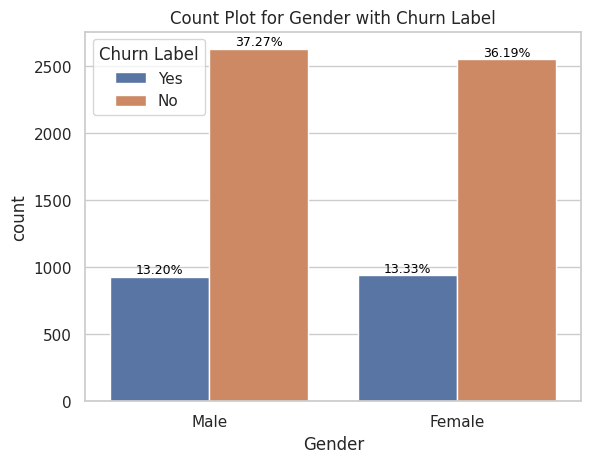

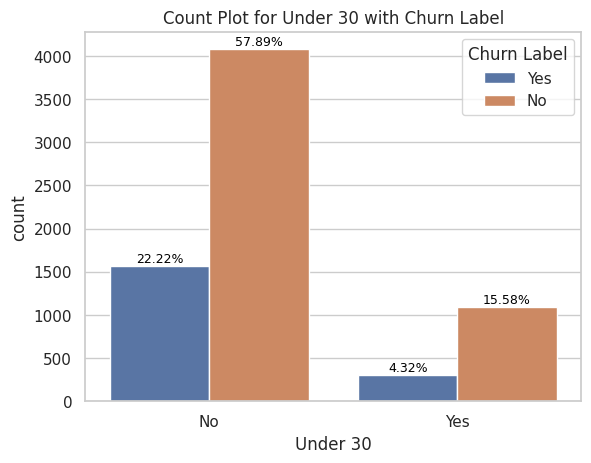

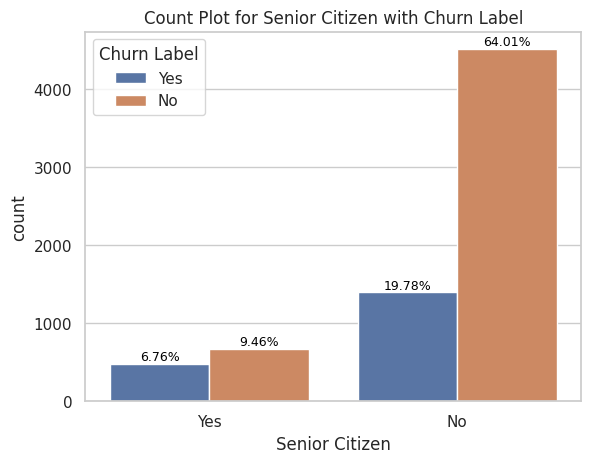

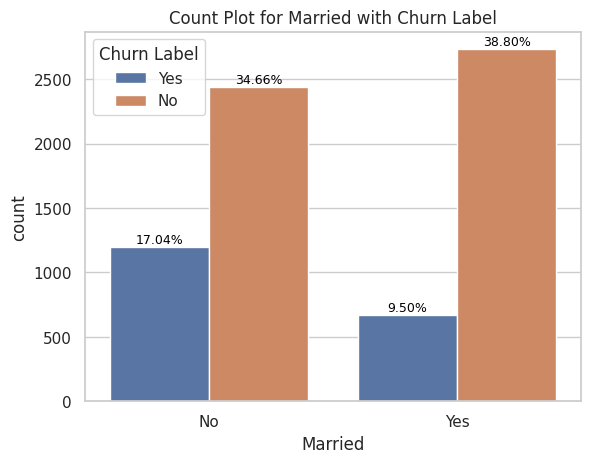

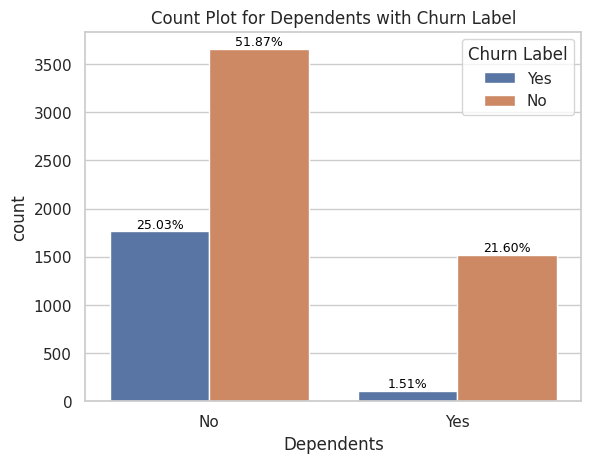

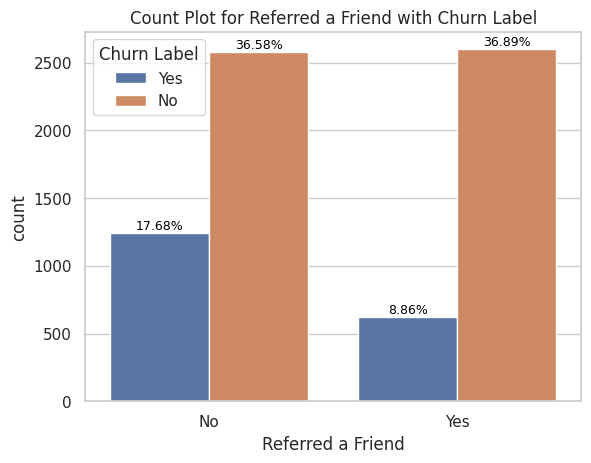

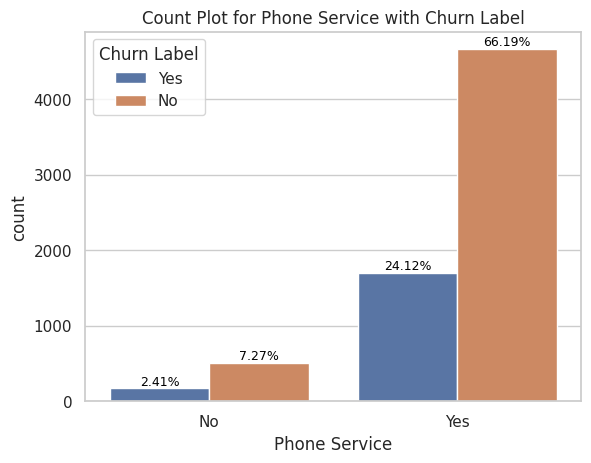

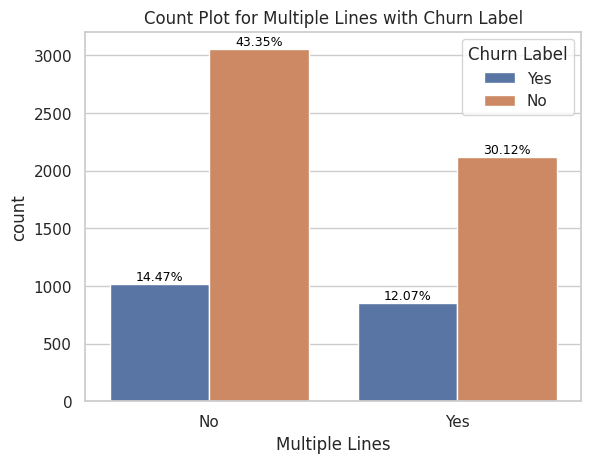

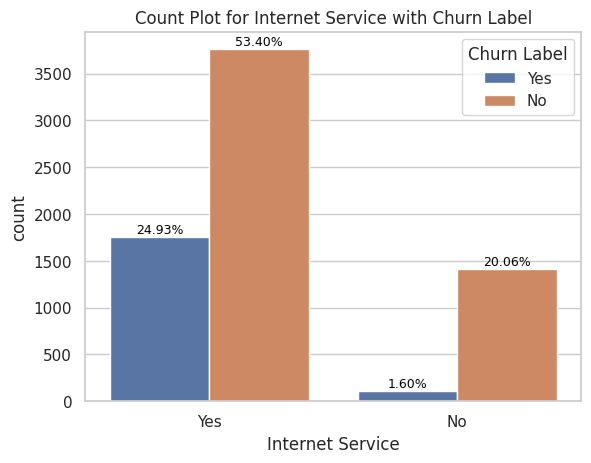

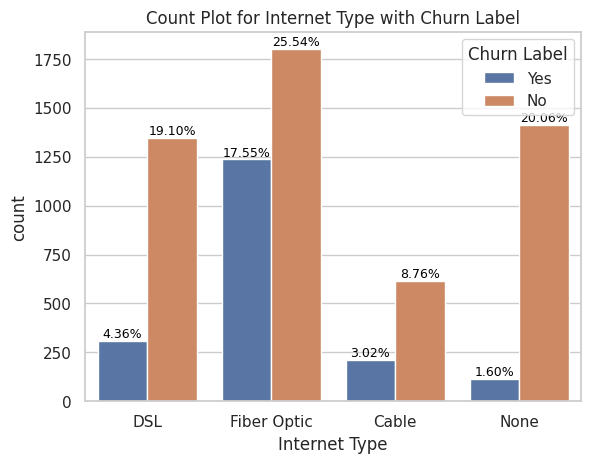

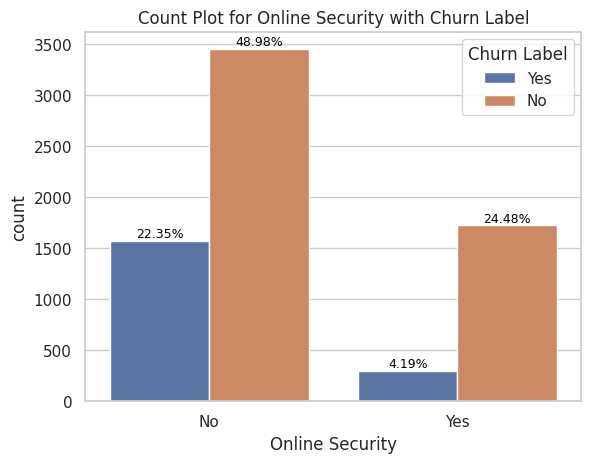

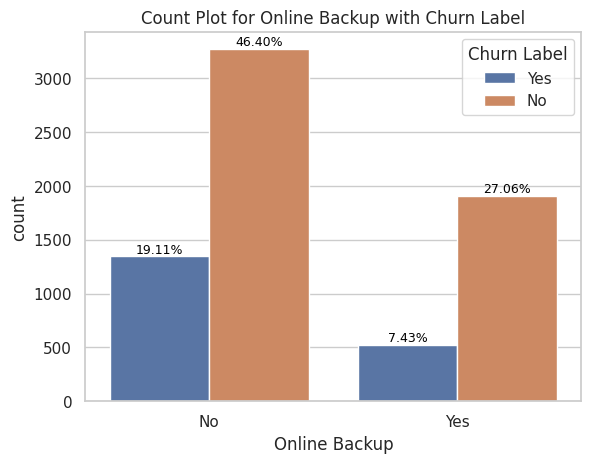

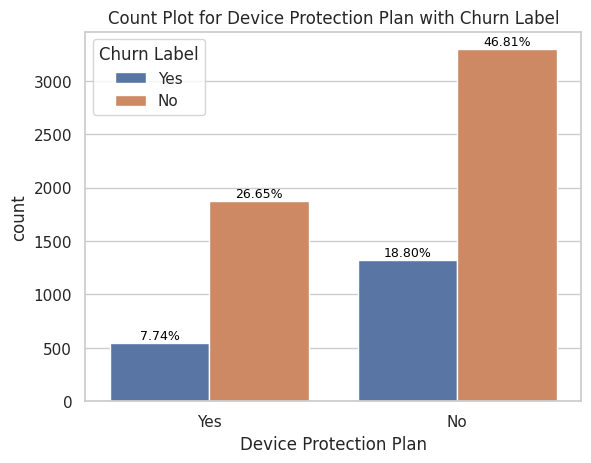

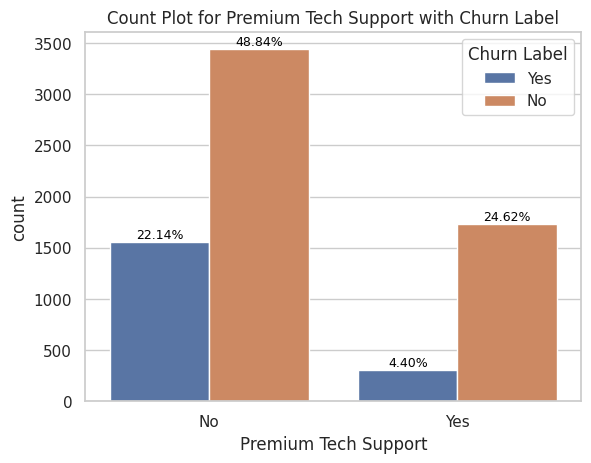

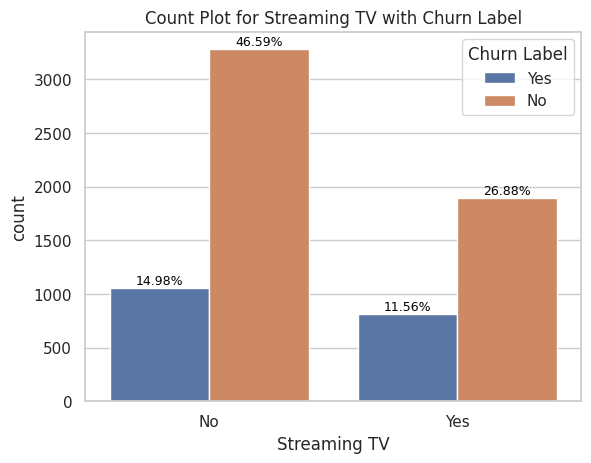

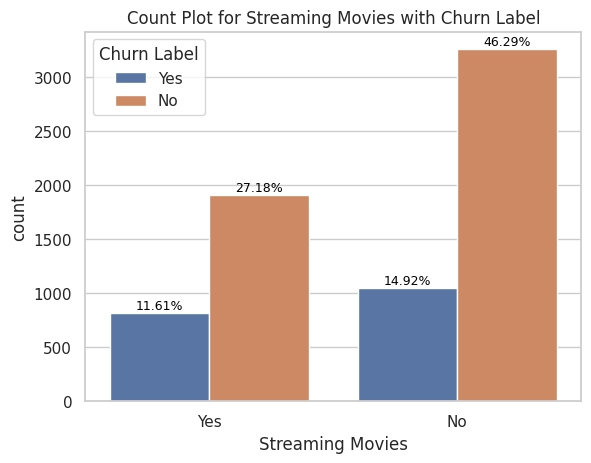

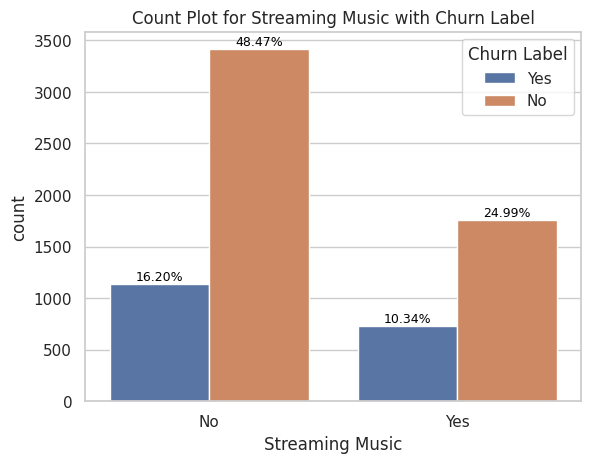

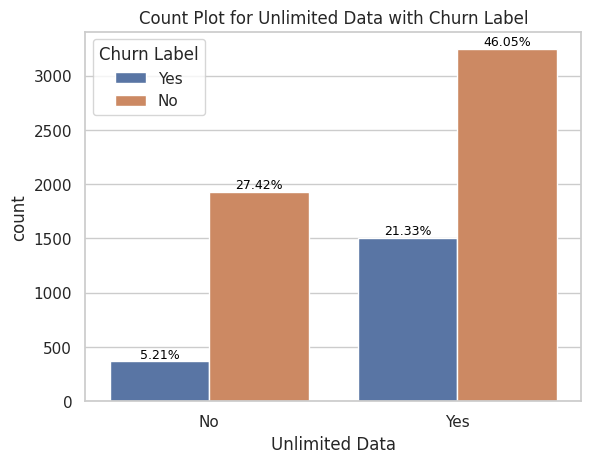

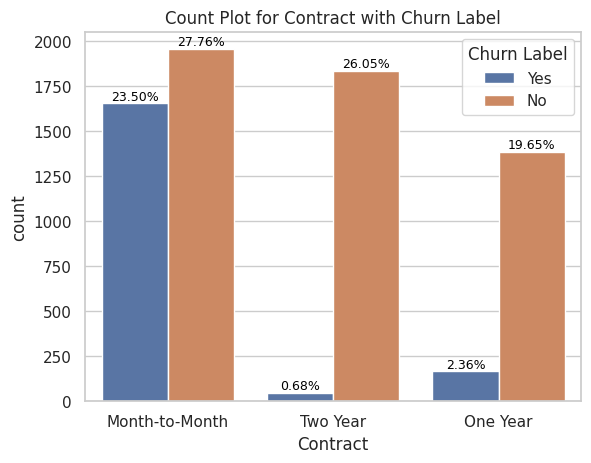

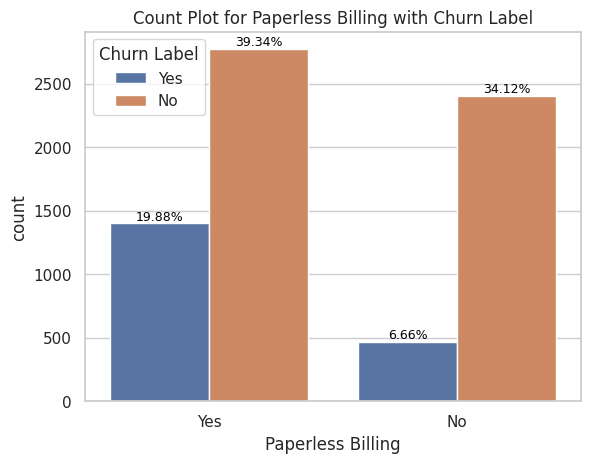

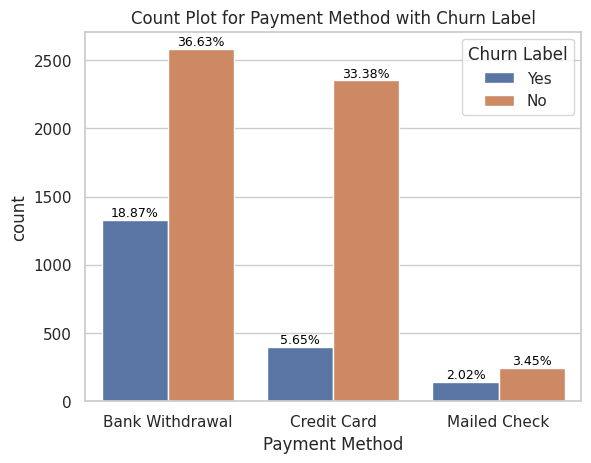

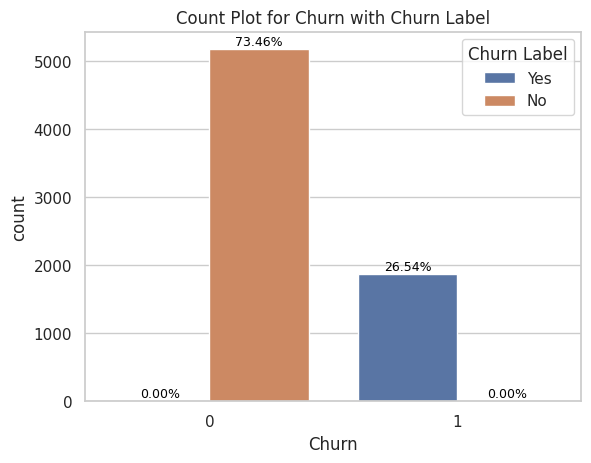

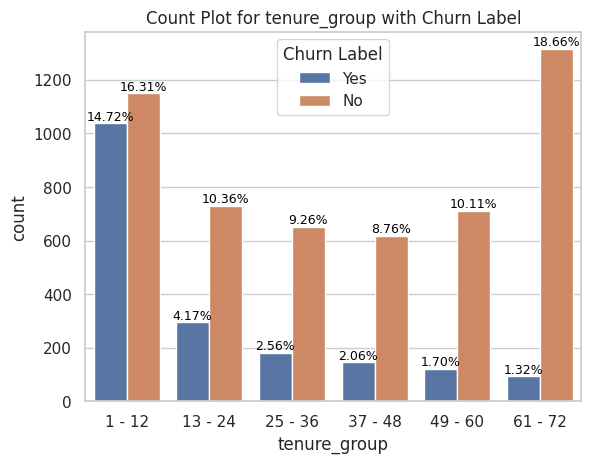

In [70]:
import seaborn as sns
import matplotlib.pyplot as plt
import os  # Import the os module

# List of columns to exclude from the count plots
columns_to_exclude = ['Churn Label', 'Total Charges', 'Tenure in Months', 'Monthly Charge', 'Avg Monthly Long Distance Charges', 'Total Refunds', 'Total Extra Data Charges', 'Satisfaction Score', 'Total Long Distance Charges', 'Total Revenue', 'Churn Score', 'CLTV','Churn Category', 'Churn Reason']

# Create a directory to save the plots
output_directory = 'count_plots/'
os.makedirs(output_directory, exist_ok=True)

# Loop through the columns and create count plots with percentages
for i, predictor in enumerate(df.columns):
    if predictor not in columns_to_exclude:
        plt.figure(i)
        ax = sns.countplot(data=df, x=predictor, hue='Churn Label')
        plt.title(f'Count Plot for {predictor} with Churn Label')

        # Calculate and display the percentages
        total_counts = len(df)
        for p in ax.patches:
            height = p.get_height()
            ax.annotate(f'{height / total_counts:.2%}', (p.get_x() + p.get_width() / 2., height),
                        ha='center', va='center', fontsize=9, color='black', xytext=(0, 5),
                        textcoords='offset points')

        # Save the plot as an image
        plt.savefig(os.path.join(output_directory, f'count_plot_{predictor}.png'), bbox_inches='tight')

        plt.show()


###**Univariate** **Analysis**

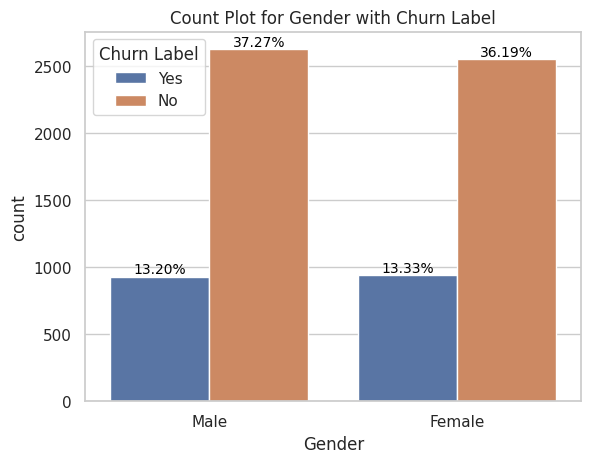

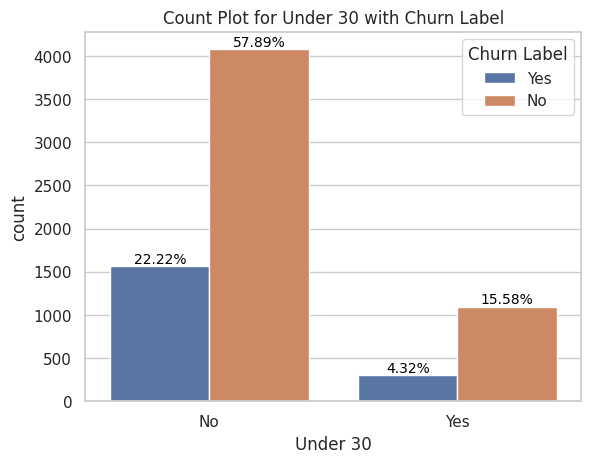

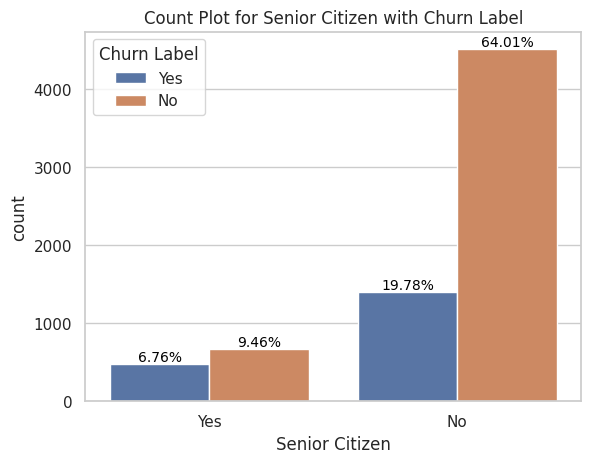

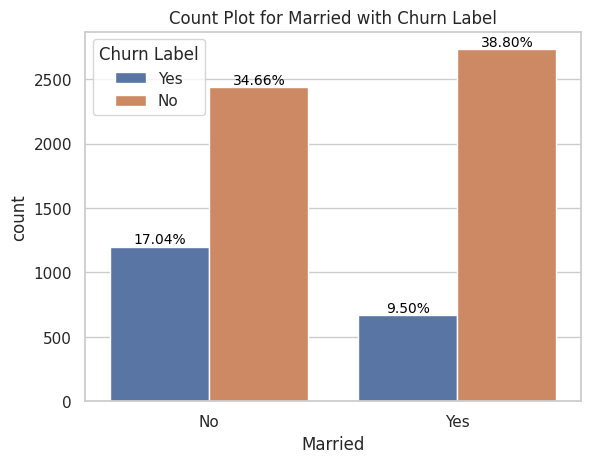

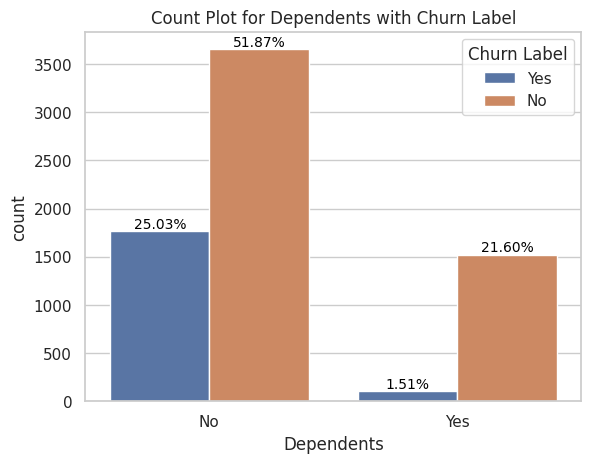

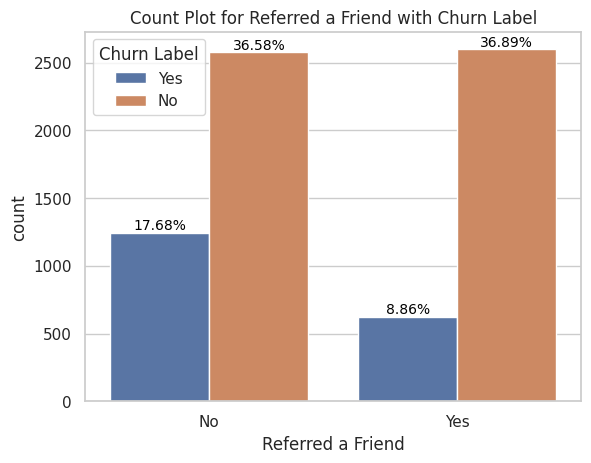

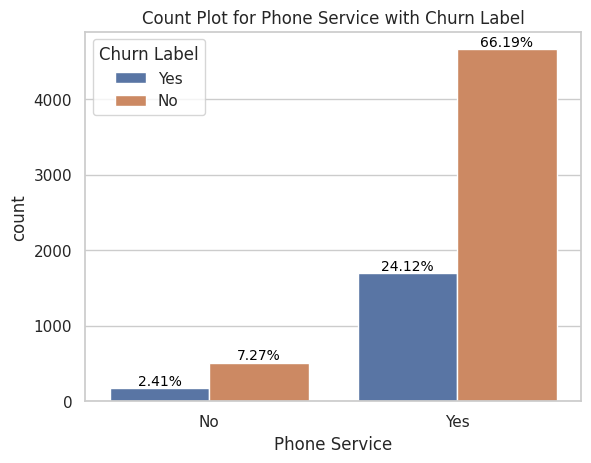

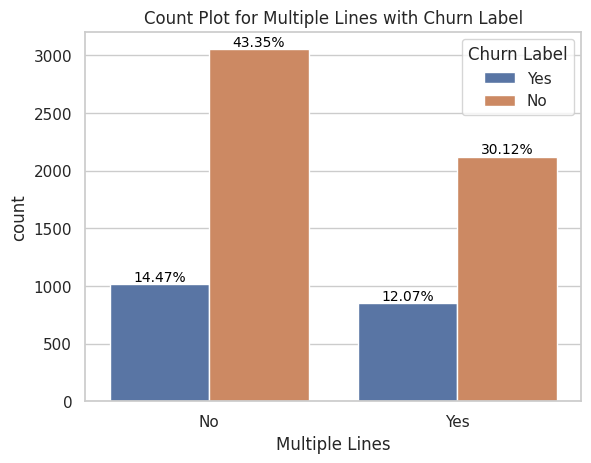

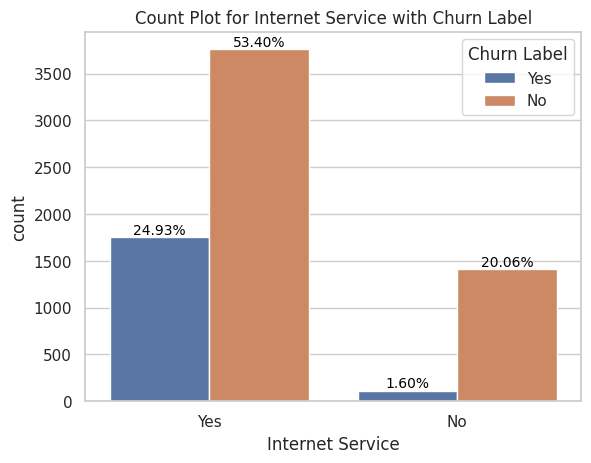

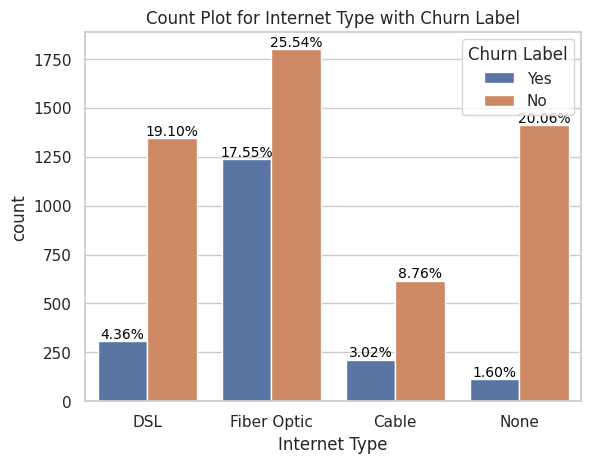

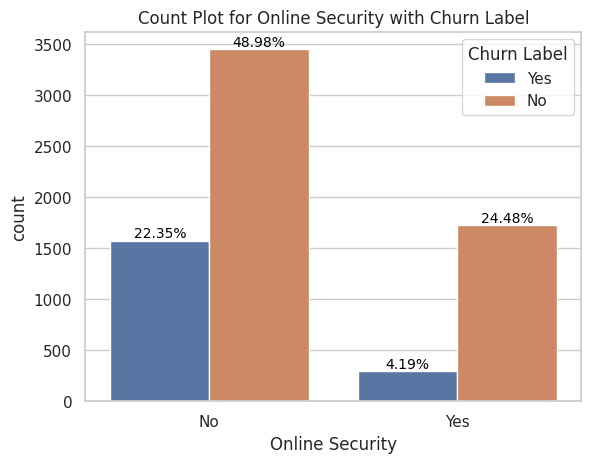

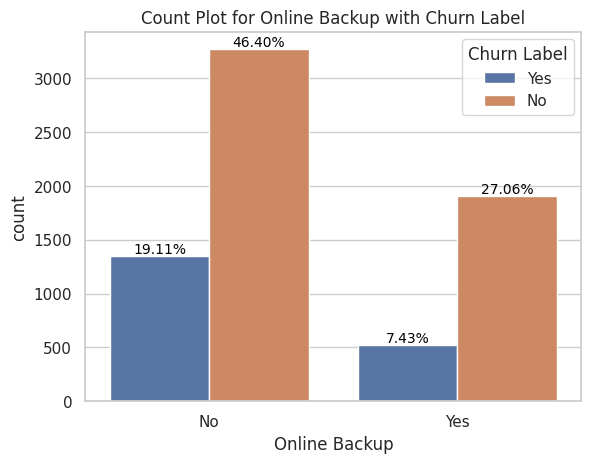

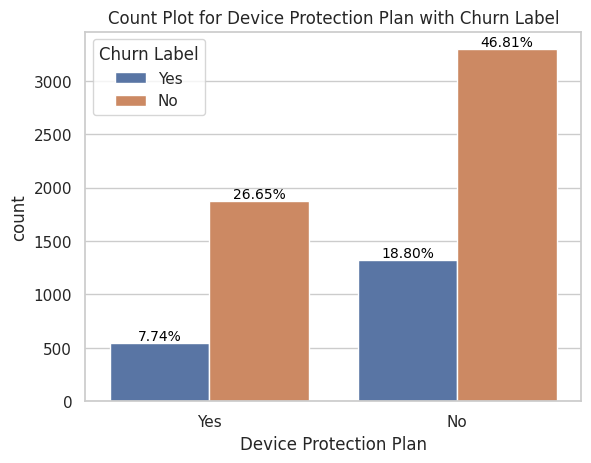

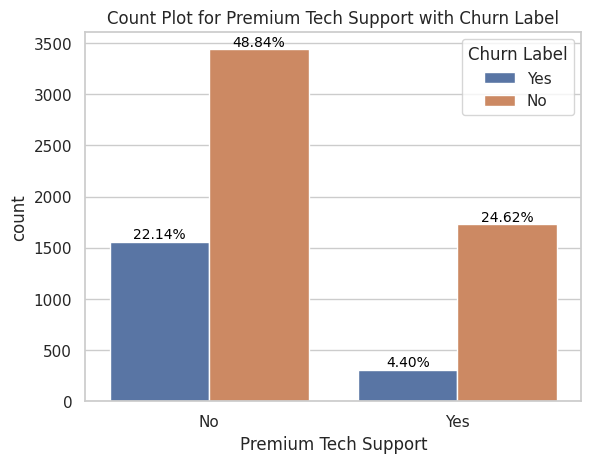

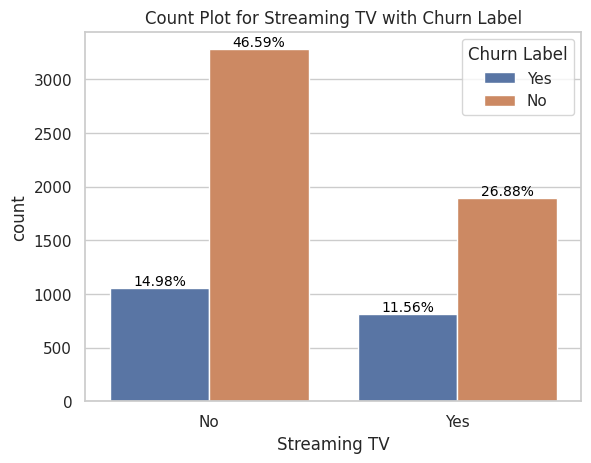

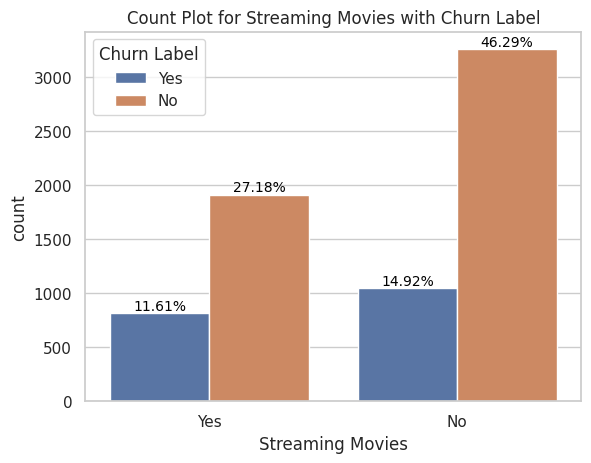

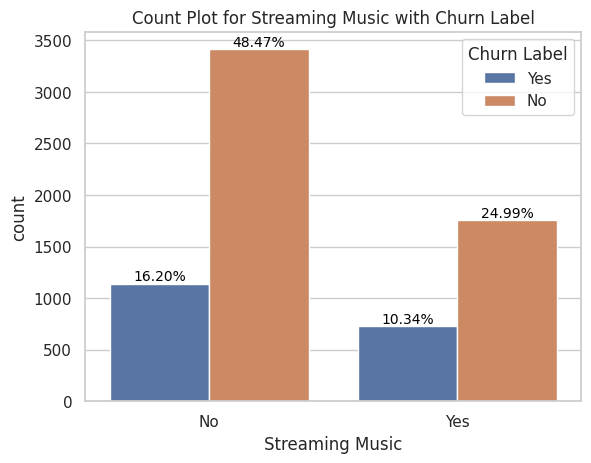

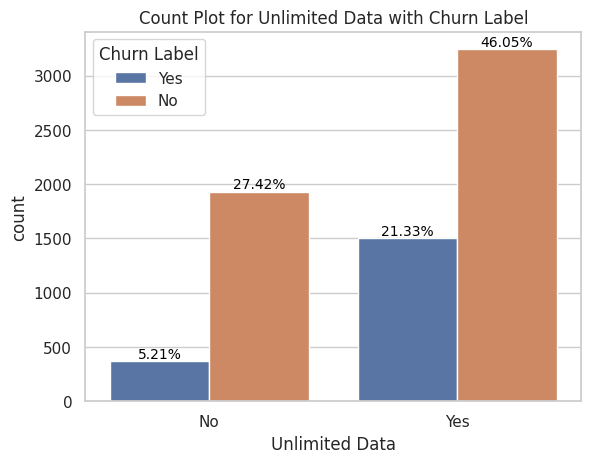

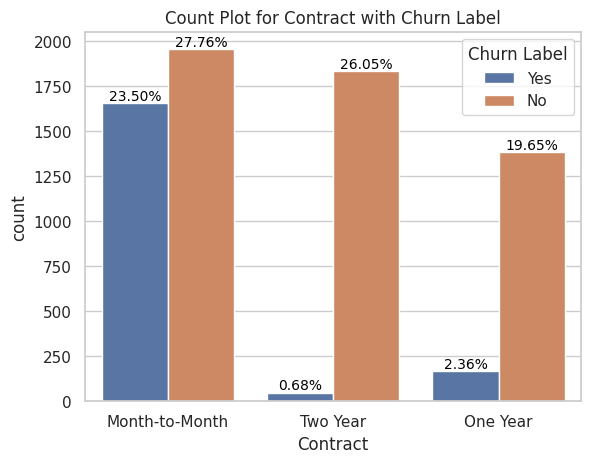

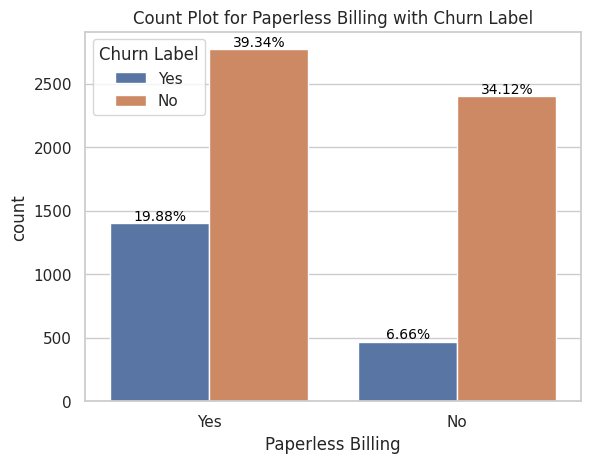

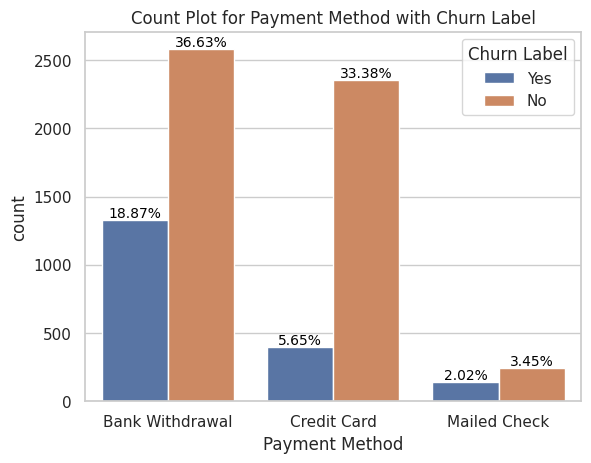

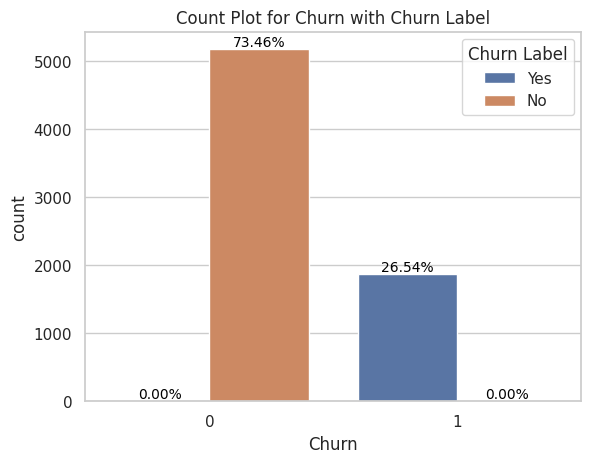

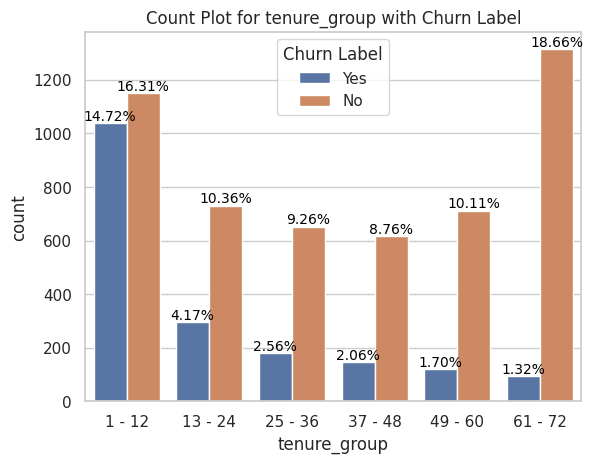

In [71]:
# List of columns to exclude from the count plots
columns_to_exclude = ['Churn Label', 'Total Charges', 'Tenure in Months', 'Monthly Charge', 'Avg Monthly Long Distance Charges', 'Total Refunds', 'Total Extra Data Charges', 'Satisfaction Score', 'Total Long Distance Charges', 'Total Revenue', 'Churn Score', 'CLTV','Churn Category', 'Churn Reason']

# Loop through the columns and create count plots with percentages
for i, predictor in enumerate(df.columns):
    if predictor not in columns_to_exclude:
        plt.figure(i)
        ax = sns.countplot(data=df, x=predictor, hue='Churn Label')
        plt.title(f'Count Plot for {predictor} with Churn Label')

        # Calculate and display the percentages
        total_counts = len(df)
        for p in ax.patches:
            height = p.get_height()
            ax.annotate(f'{height / total_counts:.2%}', (p.get_x() + p.get_width() / 2., height),
                        ha='center', va='center', fontsize=10, color='black', xytext=(0, 5),
                        textcoords='offset points')



        plt.show()


In [72]:
#for i, predictor in enumerate(df.drop(columns=['Churn Label', 'Total Charges', 'Monthly Charge','Avg Monthly Long Distance Charges', 'Total Refunds', 'Total Extra Data Charges', 'Satisfaction Score', 'Total Long Distance Charges', 'Total Revenue', 'Churn Score', 'CLTV'])):
    #plt.figure(i)
    #sns.countplot(data=df, x=predictor, hue='Churn Label')

###Parter and dependent status Parter and dependent status

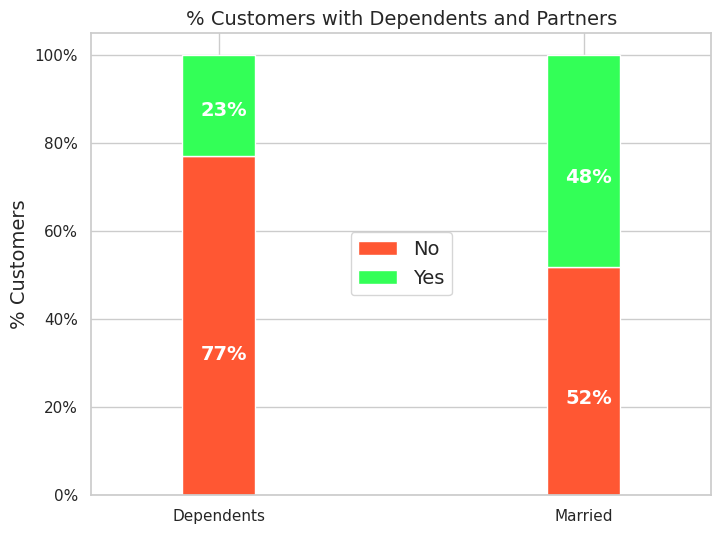

In [73]:

import matplotlib.ticker as mtick

# Replace 'df' with your actual DataFrame
df2 = pd.melt(df, value_vars=['Dependents', 'Married'])
df3 = df2.groupby(['variable', 'value']).size().unstack()
df3 = df3 * 100 / len(df)

# Define colors for the bars
colors = ['#FF5733', '#33FF57']

ax = df3.plot.bar(stacked=True, color=colors, figsize=(8, 6), rot=0, width=0.2)

ax.yaxis.set_major_formatter(mtick.PercentFormatter())
ax.set_ylabel('% Customers', size=14)
ax.set_xlabel('')
ax.set_title('% Customers with Dependents and Partners', size=14)
ax.legend(loc='center', prop={'size': 14})

for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy()
    ax.annotate('{:.0f}%'.format(height), (p.get_x() + 0.25 * width, p.get_y() + 0.4 * height), color='white', weight='bold', size=14)

plt.show()


###**User** **information**


### Tenure The time the consumer uses the company's services

Text(0.5, 1.0, 'Usage Time Distribution')

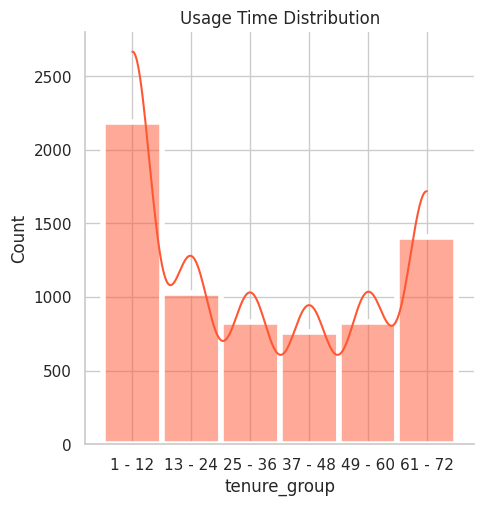

In [74]:
ax = sns.displot(df['tenure_group'],kde=True,
                bins=int(180/10),
                 color=colors[0],
                linewidth=4,)
plt.title('Usage Time Distribution')
#plt.savefig('../charts/usage_time_Distribution.jpg',bbox_inches='tight');

### Contracts Type Contracts Type

In [75]:
df['Contract'].value_counts()

Month-to-Month    3610
Two Year          1883
One Year          1550
Name: Contract, dtype: int64

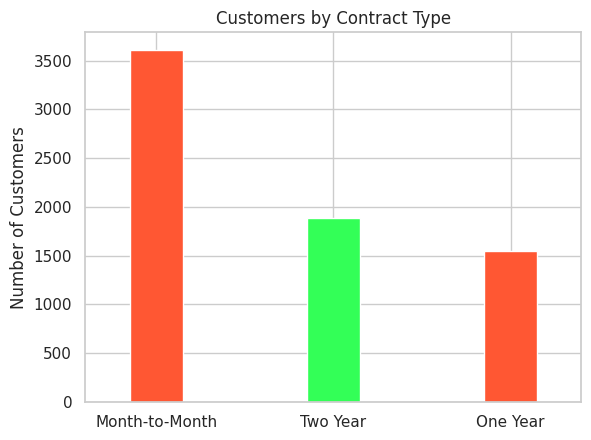

In [76]:
ax = df['Contract'].value_counts().plot(kind = 'bar',rot = 0, width = 0.3, color=colors)
ax.set_ylabel('Number of Customers')
ax.set_title('Customers by Contract Type');
#plt.savefig('../charts/Customers by Contract Type.jpg',bbox_inches='tight');

#### Tenure corresponding to different types of Contracts
+ People who choose longer-term contracts generally prefer to stay longer

<Figure size 1200x600 with 0 Axes>

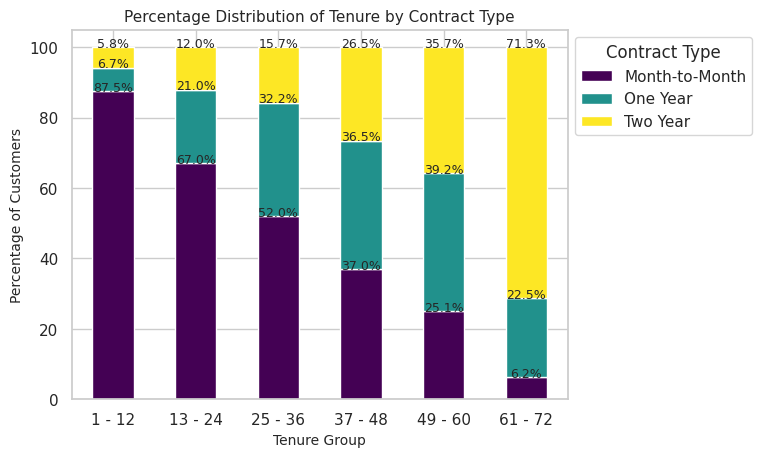

In [77]:

plt.figure(figsize=(12, 6))

bar_data = df.groupby(['tenure_group', 'Contract']).size().unstack().fillna(0)

percentage_data = bar_data.div(bar_data.sum(axis=1), axis=0) * 100

ax = percentage_data.plot(kind='bar', stacked=True, cmap='viridis')

plt.xlabel('Tenure Group', size=10)
plt.ylabel('Percentage of Customers', size=10)
plt.title('Percentage Distribution of Tenure by Contract Type', size=11)
plt.xticks(rotation=0)

# Move the legend outside of the graph
ax.legend(title='Contract Type', loc='upper left', bbox_to_anchor=(1, 1))

for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy()
    ax.annotate(f'{height:.1f}%', (x + width / 2, y + height), ha='center', size=9)

plt.show()


## The relationship between monthly charges and total charges
+ relation between monthly and total charges

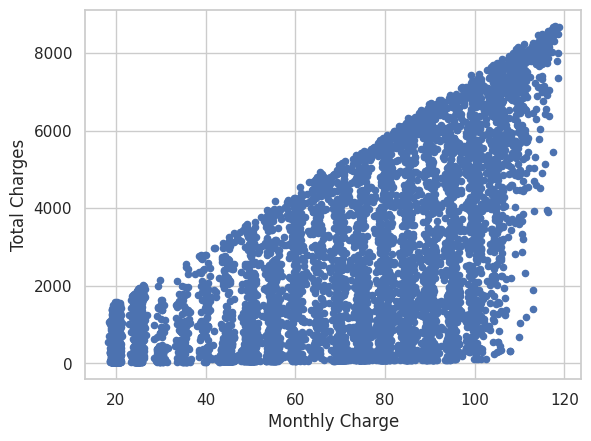

In [78]:
df[['Monthly Charge', 'Total Charges']].plot.scatter(x = 'Monthly Charge',
                                                              y='Total Charges',);

Total Charges increase as Monthly Charges increase - as expected.

## Relationship between churn rate and other variables

### Churn distribution

### Churn & Tenure The relationship between user usage time and Churn
---



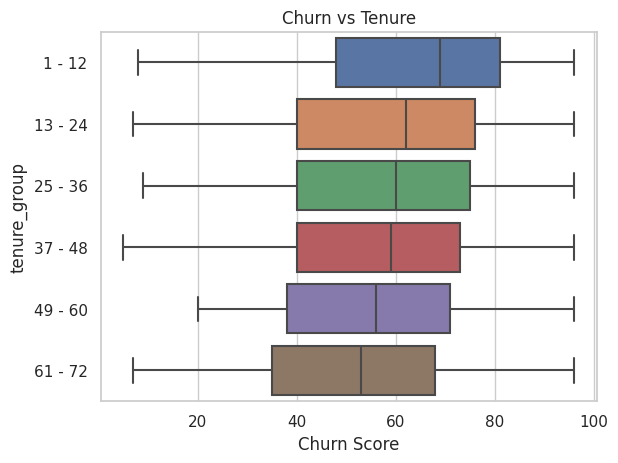

In [79]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.boxplot(x=df['Churn Score'], y=df['tenure_group'])
plt.title('Churn vs Tenure')
plt.show()  # Added to display the plot


### Churn & Contract Type

### Churn & Seniority The relationship between churn and elderly users
+ The churn rate of elderly users is almost twice that of other users

### Churn & Monthly Charges
+ Higher monthly charges tend to have higher churn

<ipython-input-80-1e6ca8db0514>:4: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  ax = sns.kdeplot(df['Monthly Charge'][df["Churn Label"] == 'No'], color=colors[0], shade=True)
<ipython-input-80-1e6ca8db0514>:5: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  ax = sns.kdeplot(df['Monthly Charge'][df["Churn Label"] == 'Yes'], ax=ax, color=colors[1], shade=True)


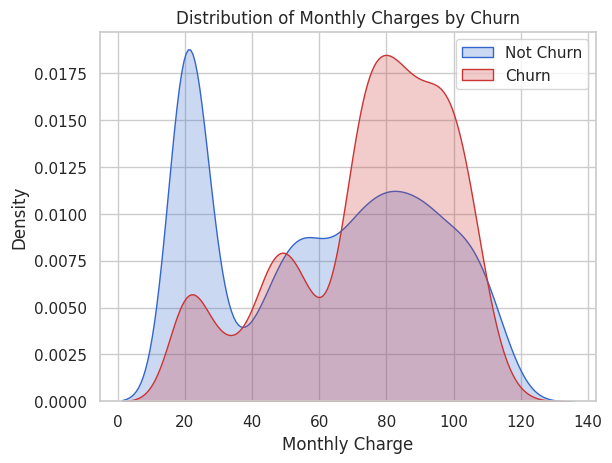

In [80]:
from numpy.ma.core import size
colors = ["#3366cc", "#cc3333"]

ax = sns.kdeplot(df['Monthly Charge'][df["Churn Label"] == 'No'], color=colors[0], shade=True)
ax = sns.kdeplot(df['Monthly Charge'][df["Churn Label"] == 'Yes'], ax=ax, color=colors[1], shade=True)

ax.legend(["Not Churn", "Churn"], loc='upper right')
ax.set_ylabel('Density')
ax.set_xlabel('Monthly Charge')
ax.set_title('Distribution of Monthly Charges by Churn')

plt.show()


### Churn & Total Charges

<ipython-input-81-476190a99aef>:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  ax = sns.kdeplot(df['Total Charges'][df["Churn Label"] == 'No'], color=colors[0], shade=True)
<ipython-input-81-476190a99aef>:4: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  ax = sns.kdeplot(df['Total Charges'][df["Churn Label"] == 'Yes'], ax=ax, color=colors[1], shade=True)


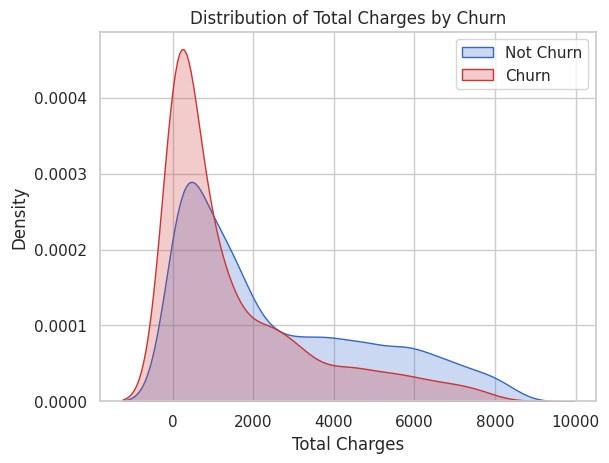

In [81]:
colors = ["#3366cc", "#cc3333"]

ax = sns.kdeplot(df['Total Charges'][df["Churn Label"] == 'No'], color=colors[0], shade=True)
ax = sns.kdeplot(df['Total Charges'][df["Churn Label"] == 'Yes'], ax=ax, color=colors[1], shade=True)

ax.legend(["Not Churn", "Churn"], loc='upper right')
ax.set_ylabel('Density')
ax.set_xlabel('Total Charges')
ax.set_title('Distribution of Total Charges by Churn')

plt.show()




Surprising insight as higher Churn at lower Total Charges

However if we combine the insights of 3 parameters i.e. Tenure, Monthly Charges & Total Charges then the picture is bit clear :- Higher Monthly Charge at lower tenure results into lower Total Charge. Hence, all these 3 factors viz Higher Monthly Charge, Lower tenure and Lower Total Charge are linkd to High Churn

+ Convert all the categorical variables into dummy variables



In [82]:
df_dummies = pd.get_dummies(df)
df_dummies.head()

Tenure in Months  Avg Monthly Long Distance Charges  Monthly Charge  \
0                 1                               0.00           39.65   
1                72                              42.55           72.10   
2                 1                               7.11           75.55   
3                66                               0.00           56.75   
4                 7                              36.49           94.05   

   Total Charges  Total Refunds  Total Extra Data Charges  \
0          39.65            0.0                        20   
1        5016.65            0.0                         0   
2          75.55            0.0                         0   
3        3708.40            0.0                         0   
4         633.45            0.0                         0   

   Total Long Distance Charges  Total Revenue  Satisfaction Score  \
0                         0.00          59.65                   3   
1                      3063.60        8080.25                   3   
2                         7.11          82.66                   5   
3                         0.00        3708.40                   3   
4                       255.43         888.88                   3   

   Churn Score  CLTV  Churn  Gender_Female  Gender_Male  Under 30_No  \
0           91  5433      1              0            1            1   
1           42  4658      0              0            1            1   
2           34  3503      0              1            0            1   
3           46  5748      0              0            1            1   
4           38  5545      0              1            0            0   

   Under 30_Yes  Senior Citizen_No  Senior Citizen_Yes  Married_No  \
0             0                  0                   1           1   
1             0                  1                   0           0   
2             0                  1                   0           1   
3             0                  1                   0           0   
4             1                  1                   0           1   

   Married_Yes  Dependents_No  Dependents_Yes  Referred a Friend_No  \
0            0              1               0                     1   
1            1              1               0                     0   
2            0              1               0                     1   
3            1              0               1                     0   
4            0              1               0                     1   

   Referred a Friend_Yes  Phone Service_No  Phone Service_Yes  \
0                      0                 1                  0   
1                      1                 0                  1   
2                      0                 0                  1   
3                      1                 1                  0   
4                      0                 0                  1   

   Multiple Lines_No  Multiple Lines_Yes  Internet Service_No  \
0                  1                   0                    0   
1                  0                   1                    0   
2                  1                   0                    0   
3                  1                   0                    0   
4                  1                   0                    0   

   Internet Service_Yes  Internet Type_Cable  Internet Type_DSL  \
0                     1                    0                  1   
1                     1                    0                  1   
2                     1                    0                  0   
3                     1                    1                  0   
4                     1                    0                  0   

   Internet Type_Fiber Optic  Internet Type_None  Online Security_No  \
0                          0                   0                   1   
1                          0                   0                   0   
2                          1                   0                   1   
3                     

###Build a corelation of all predictors with 'Churn'

<Axes: >

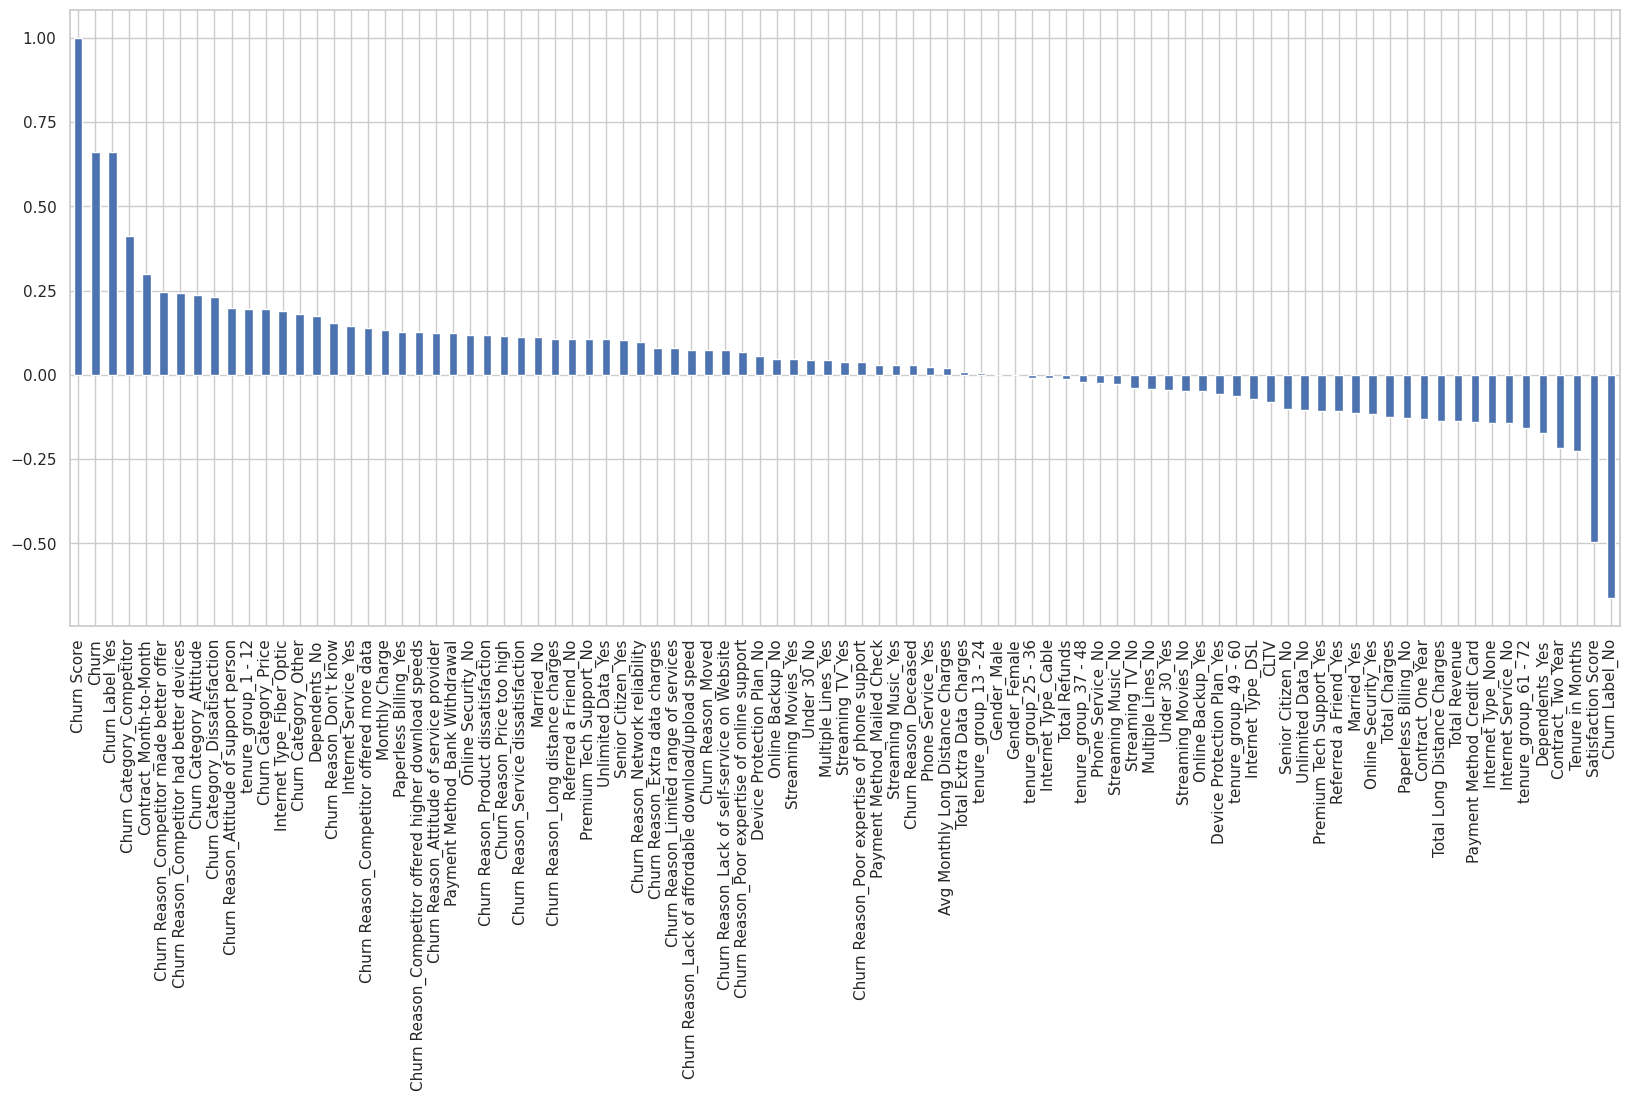

In [83]:
plt.figure(figsize=(20,8))
df_dummies.corr()['Churn Score'].sort_values(ascending = False).plot(kind='bar')

In [84]:
# Check the column names in your DataFrame
print(df_dummies.columns)


Index(['Tenure in Months', 'Avg Monthly Long Distance Charges',
       'Monthly Charge', 'Total Charges', 'Total Refunds',
       'Total Extra Data Charges', 'Total Long Distance Charges',
       'Total Revenue', 'Satisfaction Score', 'Churn Score', 'CLTV', 'Churn',
       'Gender_Female', 'Gender_Male', 'Under 30_No', 'Under 30_Yes',
       'Senior Citizen_No', 'Senior Citizen_Yes', 'Married_No', 'Married_Yes',
       'Dependents_No', 'Dependents_Yes', 'Referred a Friend_No',
       'Referred a Friend_Yes', 'Phone Service_No', 'Phone Service_Yes',
       'Multiple Lines_No', 'Multiple Lines_Yes', 'Internet Service_No',
       'Internet Service_Yes', 'Internet Type_Cable', 'Internet Type_DSL',
       'Internet Type_Fiber Optic', 'Internet Type_None', 'Online Security_No',
       'Online Security_Yes', 'Online Backup_No', 'Online Backup_Yes',
       'Device Protection Plan_No', 'Device Protection Plan_Yes',
       'Premium Tech Support_No', 'Premium Tech Support_Yes',
       'Streaming 

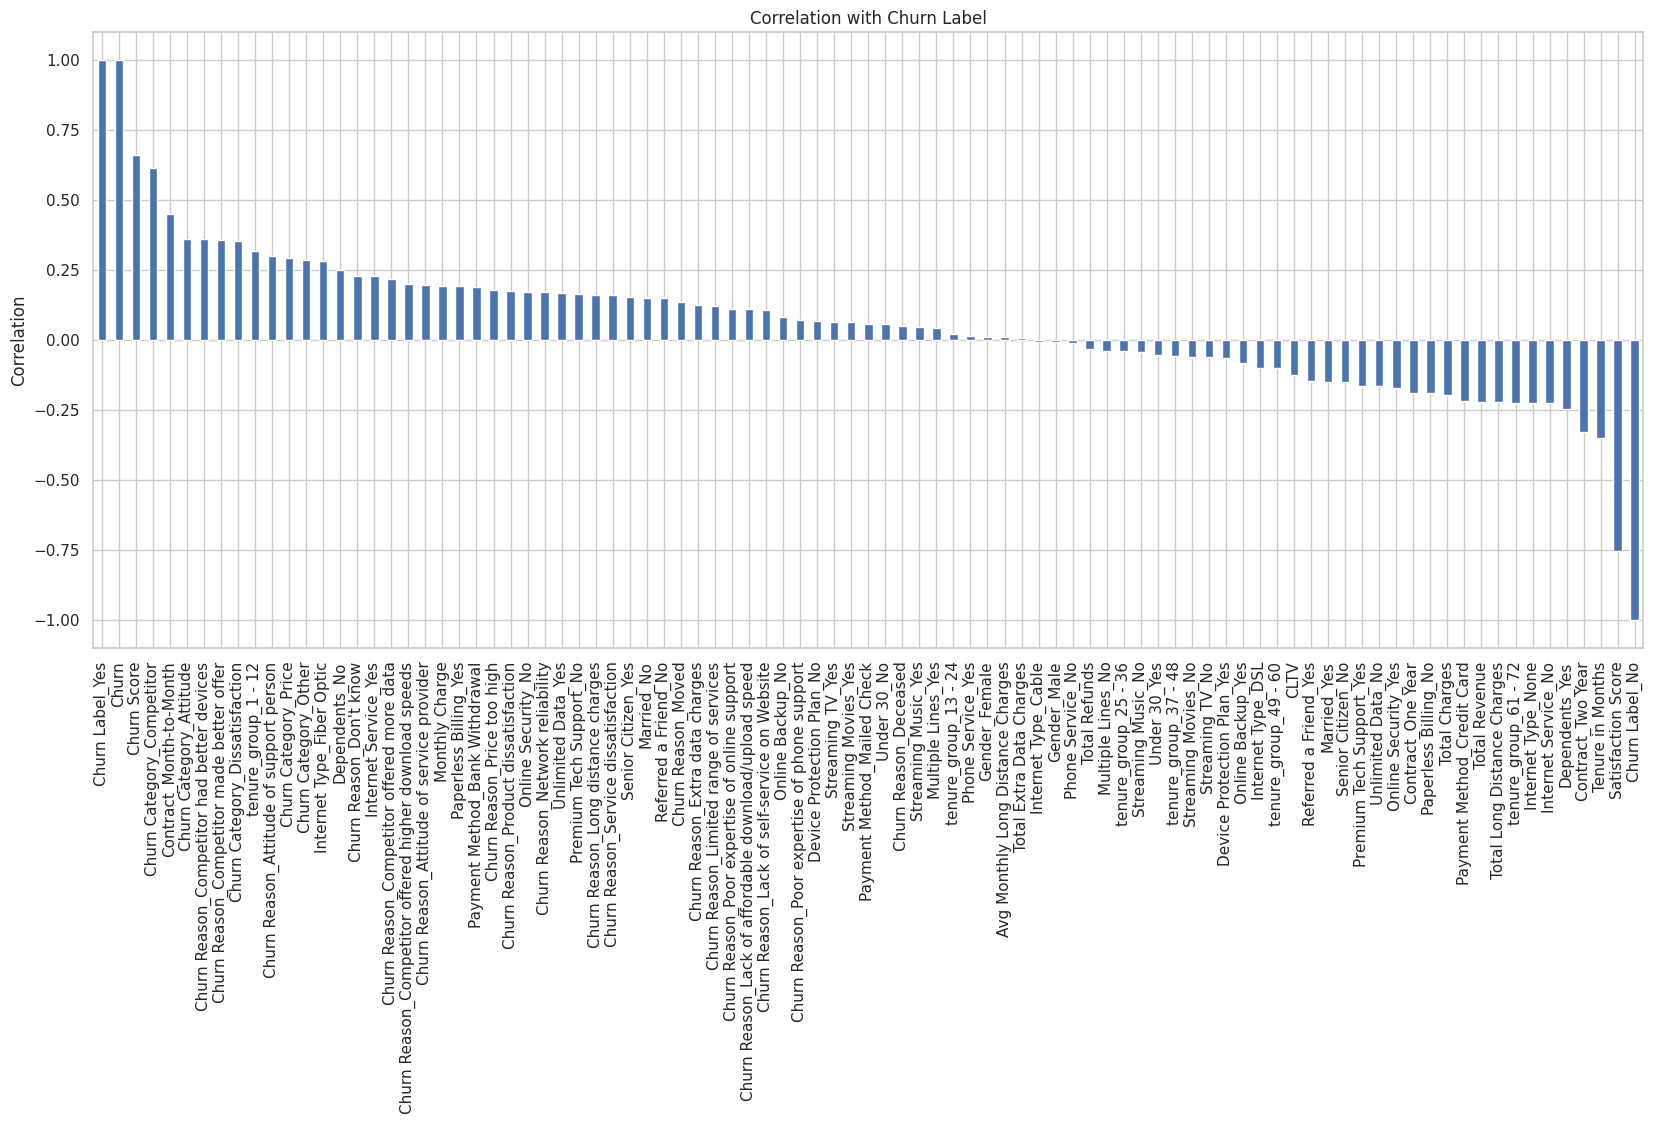

In [85]:
plt.figure(figsize=(20, 8))
df_dummies.corr()['Churn Label_Yes'].sort_values(ascending=False).plot(kind='bar')
plt.title("Correlation with Churn Label")
plt.ylabel("Correlation")
plt.show()


Derived Insight:

HIGH Churn seen in case of Month to month contracts, Monthly charges, paperless billing yes, First year of subscription and Fibre Optics Internet

LOW Churn is seens in case of Long term contracts, Subscriptions without internet service and The customers engaged for 5+ years

Factors like Gender, Availability of PhoneService and # of multiple lines have alomost NO impact on Churn

This is also evident from the Heatmap below

<Axes: >

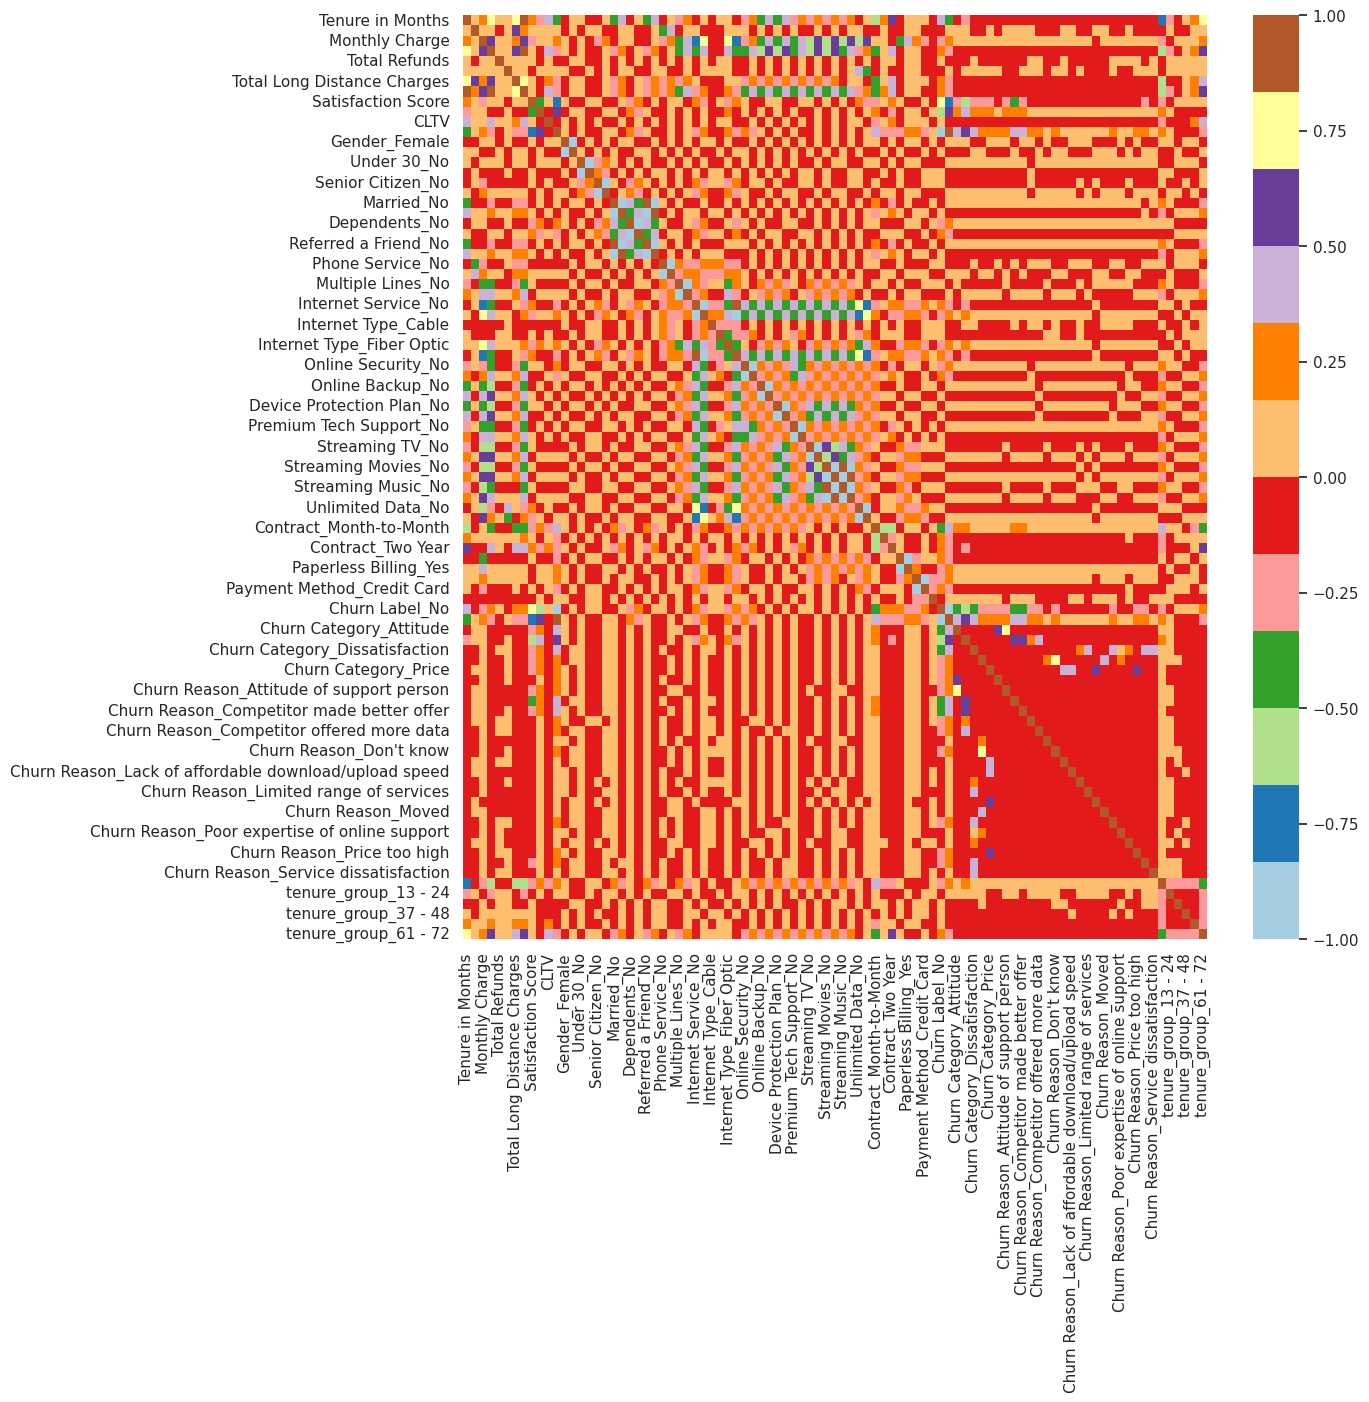

In [86]:
plt.figure(figsize=(12,12))
sns.heatmap(df_dummies.corr(), cmap="Paired")

##Bivariate Analysis

In [87]:
df.columns

Index(['Gender', 'Under 30', 'Senior Citizen', 'Married', 'Dependents',
       'Referred a Friend', 'Tenure in Months', 'Phone Service',
       'Avg Monthly Long Distance Charges', 'Multiple Lines',
       'Internet Service', 'Internet Type', 'Online Security', 'Online Backup',
       'Device Protection Plan', 'Premium Tech Support', 'Streaming TV',
       'Streaming Movies', 'Streaming Music', 'Unlimited Data', 'Contract',
       'Paperless Billing', 'Payment Method', 'Monthly Charge',
       'Total Charges', 'Total Refunds', 'Total Extra Data Charges',
       'Total Long Distance Charges', 'Total Revenue', 'Satisfaction Score',
       'Churn Label', 'Churn Score', 'CLTV', 'Churn Category', 'Churn Reason',
       'Churn', 'tenure_group'],
      dtype='object')

#User classification

## Divide according to user service time

### Check the consumption status of different categories of users

+ Total number of users in each category

In [88]:
df.groupby(['tenure_group', 'Churn Label']).count()


Gender  Under 30  Senior Citizen  Married  \
tenure_group Churn Label                                              
1 - 12       No             1149      1149            1149     1149   
             Yes            1037      1037            1037     1037   
13 - 24      No              730       730             730      730   
             Yes             294       294             294      294   
25 - 36      No              652       652             652      652   
             Yes             180       180             180      180   
37 - 48      No              617       617             617      617   
             Yes             145       145             145      145   
49 - 60      No              712       712             712      712   
             Yes             120       120             120      120   
61 - 72      No             1314      1314            1314     1314   
             Yes              93        93              93       93   

                          Dependents  Referred a Friend  Tenure in Months  \
tenure_group Churn Label                                                    
1 - 12       No                 1149               1149              1149   
             Yes                1037               1037              1037   
13 - 24      No                  730                730               730   
             Yes                 294                294               294   
25 - 36      No                  652                652               652   
             Yes                 180                180               180   
37 - 48      No                  617                617               617   
             Yes                 145                145               145   
49 - 60      No                  712                712               712   
             Yes                 120                120               120   
61 - 72      No                 1314               1314              1314   
             Yes                  93                 93                93   

                          Phone Service  Avg Monthly Long Distance Charges  \
tenure_group Churn Label                                                     
1 - 12       No                    1149                               1149   
             Yes                   1037                               1037   
13 - 24      No                     730                                730   
             Yes                    294                                294   
25 - 36      No                     652                                652   
             Yes                    180                                180   
37 - 48      No                     617                                617   
             Yes                    145                                145   
49 - 60      No                     712                                712   
             Yes                    120                                120   
61 - 72      No                    1314                               1314   
             Yes                     93                                 93   

                          Multiple Lines  Internet Service  Internet Type  \
tenure_group Churn Label                                                    
1 - 12       No                     1149              1149           1149   
             Yes                    1037              1037           1037   
13 - 24      No                      730               730            730   
             Yes                     294               294            294   
25 - 36      No                      652               652            652   
             Yes                     180               180            180   
37 - 48      No                      617               617            617   
             Yes                     145               145            145   
49 - 60      No                      712               712            712   
            

#Survival Analysis

In [89]:
!pip install lifelines


In [90]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm
import statsmodels.api as st
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()

#Lifelines is a survival analysis package
from lifelines import KaplanMeierFitter
from lifelines.statistics import multivariate_logrank_test
from lifelines.statistics import logrank_test
from lifelines import CoxPHFitter

In [91]:
df.Churn = labelencoder.fit_transform(df.Churn)
df.Churn.value_counts()

0    5174
1    1869
Name: Churn, dtype: int64

#####Event is defined as the time at which the customer unsubscribe a marketing channel. Time of origin is defined as the time at which the customer starts the service / subscription of a marketing channel.

In [92]:
eventvar = df['Churn']
timevar = df['Tenure in Months']

In [93]:
#For the analysis, I will need to create dummy variables for all categorical variables.
categorical = ['Gender', 'Under 30', 'Senior Citizen', 'Married', 'Dependents',
       'Referred a Friend', 'Phone Service', 'Multiple Lines',
       'Internet Service', 'Internet Type', 'Online Security', 'Online Backup',
       'Device Protection Plan', 'Premium Tech Support', 'Streaming TV',
       'Streaming Movies', 'Streaming Music', 'Unlimited Data', 'Contract',
       'Paperless Billing', 'Payment Method', 'Churn Label', 'Churn Category',
       'Churn Reason']

survival_data = pd.get_dummies(df, columns = categorical, drop_first= True)
survival_data.head()

Tenure in Months  Avg Monthly Long Distance Charges  Monthly Charge  \
0                 1                               0.00           39.65   
1                72                              42.55           72.10   
2                 1                               7.11           75.55   
3                66                               0.00           56.75   
4                 7                              36.49           94.05   

   Total Charges  Total Refunds  Total Extra Data Charges  \
0          39.65            0.0                        20   
1        5016.65            0.0                         0   
2          75.55            0.0                         0   
3        3708.40            0.0                         0   
4         633.45            0.0                         0   

   Total Long Distance Charges  Total Revenue  Satisfaction Score  \
0                         0.00          59.65                   3   
1                      3063.60        8080.25                   3   
2                         7.11          82.66                   5   
3                         0.00        3708.40                   3   
4                       255.43         888.88                   3   

   Churn Score  CLTV  Churn tenure_group  Gender_Male  Under 30_Yes  \
0           91  5433      1       1 - 12            1             0   
1           42  4658      0      61 - 72            1             0   
2           34  3503      0       1 - 12            0             0   
3           46  5748      0      61 - 72            1             0   
4           38  5545      0       1 - 12            0             1   

   Senior Citizen_Yes  Married_Yes  Dependents_Yes  Referred a Friend_Yes  \
0                   1            0               0                      0   
1                   0            1               0                      1   
2                   0            0               0                      0   
3                   0            1               1                      1   
4                   0            0               0                      0   

   Phone Service_Yes  Multiple Lines_Yes  Internet Service_Yes  \
0                  0                   0                     1   
1                  1                   1                     1   
2                  1                   0                     1   
3                  0                   0                     1   
4                  1                   0                     1   

   Internet Type_DSL  Internet Type_Fiber Optic  Internet Type_None  \
0                  1                          0                   0   
1                  1                          0                   0   
2                  0                          1                   0   
3                  0                          0                   0   
4                  0                          1                   0   

   Online Security_Yes  Online Backup_Yes  Device Protection Plan_Yes  \
0                    0                  0                           1   
1                    1                  1                           1   
2                    0                  0                           1   
3                    0                  1                           1   
4                    0                  1                           0   

   Premium Tech Support_Yes  Streaming TV_Yes  Streaming Movies_Yes  \
0                         0                 0                     1   
1                         1                 0                     0   
2                         0                 0                     0   
3                         0                 1                     1   
4                         0                 1                     1   

   Streaming Music_Yes  Unlimited Data_Yes  Contract_One Year  \
0                    0                   0                  0   
1                    0                   1                  0   
2

In [94]:
#drop variables such as customerID, tenure, Churn as they are not needed in survival data.
#Also, we need to add constant for survival analysis.
survival_data.drop(['Tenure in Months', 'Churn'], axis = 1, inplace= True)
survival_data = st.add_constant(survival_data, prepend=False)
survival_data.head()

Avg Monthly Long Distance Charges  Monthly Charge  Total Charges  \
0                               0.00           39.65          39.65   
1                              42.55           72.10        5016.65   
2                               7.11           75.55          75.55   
3                               0.00           56.75        3708.40   
4                              36.49           94.05         633.45   

   Total Refunds  Total Extra Data Charges  Total Long Distance Charges  \
0            0.0                        20                         0.00   
1            0.0                         0                      3063.60   
2            0.0                         0                         7.11   
3            0.0                         0                         0.00   
4            0.0                         0                       255.43   

   Total Revenue  Satisfaction Score  Churn Score  CLTV tenure_group  \
0          59.65                   3           91  5433       1 - 12   
1        8080.25                   3           42  4658      61 - 72   
2          82.66                   5           34  3503       1 - 12   
3        3708.40                   3           46  5748      61 - 72   
4         888.88                   3           38  5545       1 - 12   

   Gender_Male  Under 30_Yes  Senior Citizen_Yes  Married_Yes  Dependents_Yes  \
0            1             0                   1            0               0   
1            1             0                   0            1               0   
2            0             0                   0            0               0   
3            1             0                   0            1               1   
4            0             1                   0            0               0   

   Referred a Friend_Yes  Phone Service_Yes  Multiple Lines_Yes  \
0                      0                  0                   0   
1                      1                  1                   1   
2                      0                  1                   0   
3                      1                  0                   0   
4                      0                  1                   0   

   Internet Service_Yes  Internet Type_DSL  Internet Type_Fiber Optic  \
0                     1                  1                          0   
1                     1                  1                          0   
2                     1                  0                          1   
3                     1                  0                          0   
4                     1                  0                          1   

   Internet Type_None  Online Security_Yes  Online Backup_Yes  \
0                   0                    0                  0   
1                   0                    1                  1   
2                   0                    0                  0   
3                   0                    0                  1   
4                   0                    0                  1   

   Device Protection Plan_Yes  Premium Tech Support_Yes  Streaming TV_Yes  \
0                           1                         0                 0   
1                           1                         1                 0   
2                           1                         0                 0   
3                           1                         0                 1   
4                           0                         0                 1   

   Streaming Movies_Yes  Streaming Music_Yes  Unlimited Data_Yes  \
0                     1                    0                   0   
1                     0                    0                   1   
2                     0                    0                   1   
3                     1                    1                   1   
4                     1                    1                   1   

   Contract_One Year  Contract_Two Year  Paperless Billing_Yes  \
0                  0              

In [95]:
survival_data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 61 columns):
 #   Column                                                  Non-Null Count  Dtype   
---  ------                                                  --------------  -----   
 0   Avg Monthly Long Distance Charges                       7043 non-null   float64 
 1   Monthly Charge                                          7043 non-null   float64 
 2   Total Charges                                           7043 non-null   float64 
 3   Total Refunds                                           7043 non-null   float64 
 4   Total Extra Data Charges                                7043 non-null   int64   
 5   Total Long Distance Charges                             7043 non-null   float64 
 6   Total Revenue                                           7043 non-null   float64 
 7   Satisfaction Score                                      7043 non-null   int64   
 8   Churn Score                 

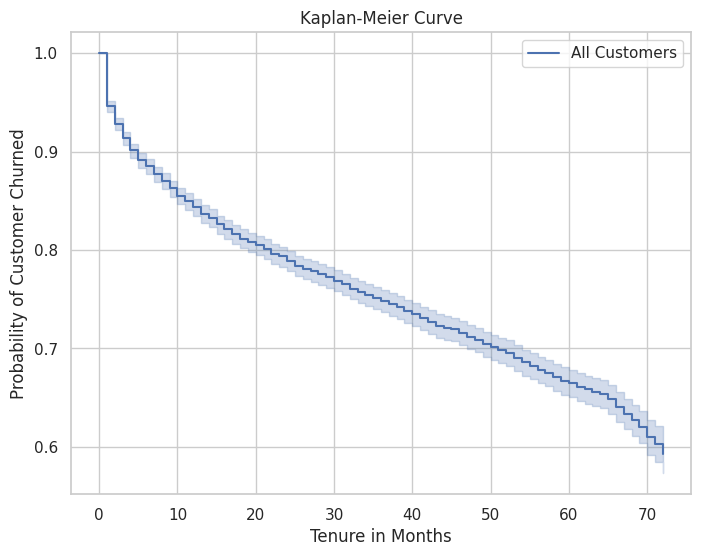

In [109]:
#Create a KaplanMeier object, imported from lifelines
kmf = KaplanMeierFitter()
#Calculate the K-M curve for all groups
kmf.fit(timevar,event_observed = eventvar,label = "All Customers")
#Plot the curve and assign labels
plt.figure(figsize=(8,6))
kmf.plot()
plt.ylabel('Probability of Customer Churned')
plt.xlabel('Tenure in Months')
plt.title('Kaplan-Meier Curve');

#####As we can see, there is a sudden drop in the starting which says that after one tenure only customers starts churning rapidly and after that churning rate decreases. To deal with that we can consider giving more discounts on long-term plans and make more customers to subscribe for long term plans.

<lifelines.StatisticalResult: logrank_test>
               t_0 = -1
 null_distribution = chi squared
degrees_of_freedom = 1
         test_name = logrank_test

---
 test_statistic    p  -log2(p)
           0.53 0.47      1.10

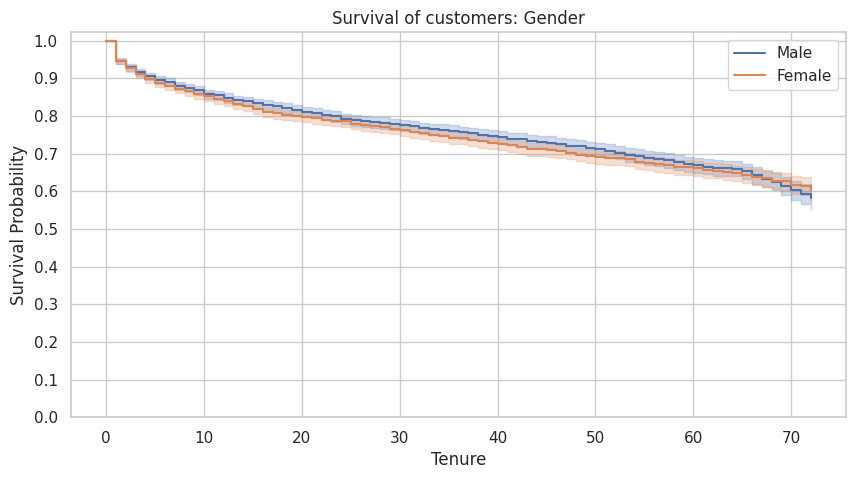

In [97]:
male = (survival_data['Gender_Male'] == 1)
female = (survival_data['Gender_Male'] == 0)

plt.figure(figsize=(10,5))
ax = plt.subplot(1,1,1)

kmf.fit(timevar[male],event_observed = eventvar[male],label = "Male")
plot1 = kmf.plot(ax = ax)

kmf.fit(timevar[female],event_observed = eventvar[female],label = "Female")
plot2 = kmf.plot(ax = plot1)

plt.title('Survival of customers: Gender')
plt.xlabel('Tenure')
plt.ylabel('Survival Probability')
plt.yticks(np.linspace(0,1,11))
groups = logrank_test(timevar[male], timevar[female], event_observed_A=eventvar[male], event_observed_B=eventvar[female])
groups.print_summary()

###Senior Citizen

<lifelines.StatisticalResult: logrank_test>
               t_0 = -1
 null_distribution = chi squared
degrees_of_freedom = 1
         test_name = logrank_test

---
 test_statistic      p  -log2(p)
         109.93 <0.005     83.03

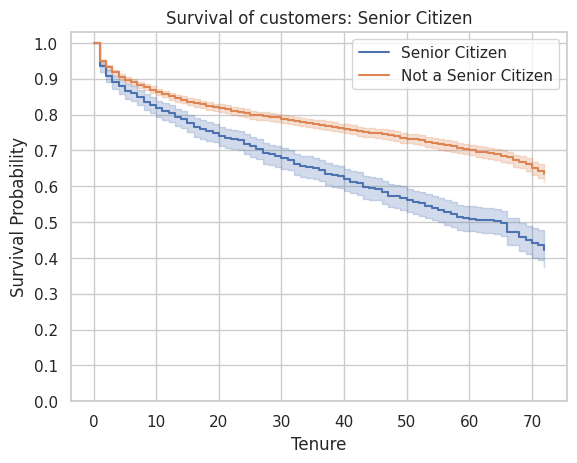

In [98]:
SeniorCitizen = (survival_data['Senior Citizen_Yes'] == 1)
no_SeniorCitizen = (survival_data['Senior Citizen_Yes'] == 0)

plt.figure()
ax = plt.subplot(1,1,1)

kmf.fit(timevar[SeniorCitizen],event_observed = eventvar[SeniorCitizen],label = "Senior Citizen")
plot1 = kmf.plot(ax = ax)

kmf.fit(timevar[no_SeniorCitizen],event_observed = eventvar[no_SeniorCitizen],label = "Not a Senior Citizen")
plot2 = kmf.plot(ax = plot1)

plt.title('Survival of customers: Senior Citizen')
plt.xlabel('Tenure')
plt.ylabel('Survival Probability')
plt.yticks(np.linspace(0,1,11))
groups = logrank_test(timevar[SeniorCitizen], timevar[no_SeniorCitizen], event_observed_A=eventvar[SeniorCitizen], event_observed_B=eventvar[no_SeniorCitizen])
groups.print_summary()

###Marital Status

<lifelines.StatisticalResult: logrank_test>
               t_0 = -1
 null_distribution = chi squared
degrees_of_freedom = 1
         test_name = logrank_test

---
 test_statistic      p  -log2(p)
         424.55 <0.005    310.95

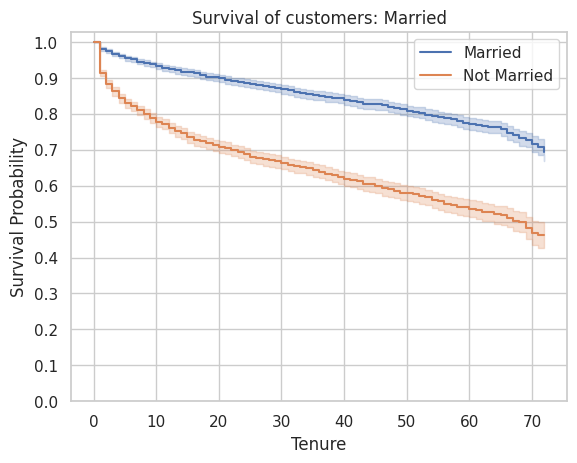

In [99]:
partner = (survival_data['Married_Yes'] == 1)
no_partner = (survival_data['Married_Yes'] == 0)

plt.figure()
ax = plt.subplot(1,1,1)

kmf.fit(timevar[partner],event_observed = eventvar[partner],label = "Married")
plot1 = kmf.plot(ax = ax)

kmf.fit(timevar[no_partner],event_observed = eventvar[no_partner],label = "Not Married")
plot2 = kmf.plot(ax = plot1)

plt.title('Survival of customers: Married')
plt.xlabel('Tenure')
plt.ylabel('Survival Probability')
plt.yticks(np.linspace(0,1,11))
groups = logrank_test(timevar[partner], timevar[no_partner], event_observed_A=eventvar[partner], event_observed_B=eventvar[no_partner])
groups.print_summary()

###Dependents

<lifelines.StatisticalResult: logrank_test>
               t_0 = -1
 null_distribution = chi squared
degrees_of_freedom = 1
         test_name = logrank_test

---
 test_statistic      p  -log2(p)
         415.57 <0.005    304.45

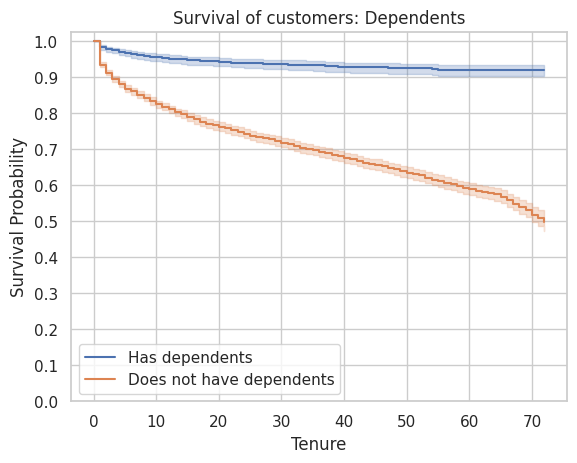

In [100]:
Dependents = (survival_data['Dependents_Yes'] == 1)
no_Dependents = (survival_data['Dependents_Yes'] == 0)

plt.figure()
ax = plt.subplot(1,1,1)

kmf.fit(timevar[Dependents],event_observed = eventvar[Dependents],label = "Has dependents")
plot1 = kmf.plot(ax = ax)

kmf.fit(timevar[no_Dependents],event_observed = eventvar[no_Dependents],label = "Does not have dependents")
plot2 = kmf.plot(ax = plot1)

plt.title('Survival of customers: Dependents')
plt.xlabel('Tenure')
plt.ylabel('Survival Probability')
plt.yticks(np.linspace(0,1,11))
groups = logrank_test(timevar[Dependents], timevar[no_Dependents], event_observed_A=eventvar[Dependents], event_observed_B=eventvar[no_Dependents])
groups.print_summary()

###PhoneService

<lifelines.StatisticalResult: logrank_test>
               t_0 = -1
 null_distribution = chi squared
degrees_of_freedom = 1
         test_name = logrank_test

---
 test_statistic    p  -log2(p)
           0.45 0.50      0.99

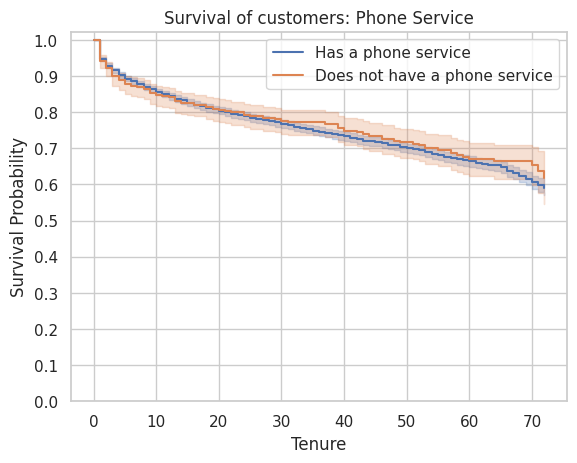

In [101]:
PhoneService = (survival_data['Phone Service_Yes'] == 1)
no_PhoneService = (survival_data['Phone Service_Yes'] == 0)

plt.figure()
ax = plt.subplot(1,1,1)

kmf.fit(timevar[PhoneService],event_observed = eventvar[PhoneService],label = "Has a phone service")
plot1 = kmf.plot(ax = ax)

kmf.fit(timevar[no_PhoneService],event_observed = eventvar[no_PhoneService],label = "Does not have a phone service")
plot2 = kmf.plot(ax = plot1)

plt.title('Survival of customers: Phone Service')
plt.xlabel('Tenure')
plt.ylabel('Survival Probability')
plt.yticks(np.linspace(0,1,11))
groups = logrank_test(timevar[PhoneService], timevar[no_PhoneService], event_observed_A=eventvar[PhoneService], event_observed_B=eventvar[no_PhoneService])
groups.print_summary()

###Internet Services

<lifelines.StatisticalResult: multivariate_logrank_test>
               t_0 = -1
 null_distribution = chi squared
degrees_of_freedom = 1
             alpha = 0.95
         test_name = multivariate_logrank_test

---
 test_statistic      p  -log2(p)
         251.96 <0.005    186.07

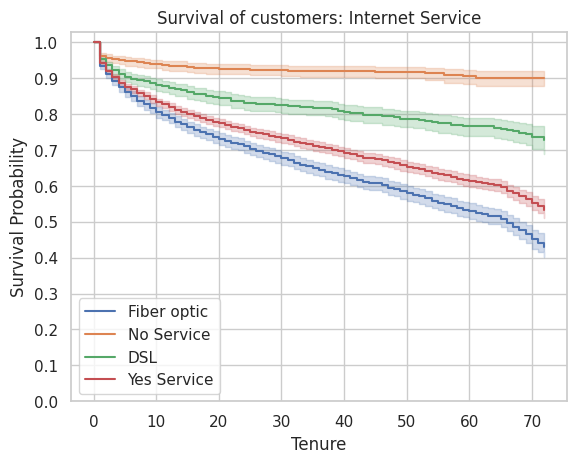

In [102]:
Fiber_optic = (survival_data['Internet Type_Fiber Optic'] == 1)
No_Service = (survival_data['Internet Type_None'] == 1)
DSL = (survival_data['Internet Type_DSL'] == 1)
Yes_Service = (survival_data['Internet Service_Yes'] == 1)
plt.figure()
ax = plt.subplot(1,1,1)

kmf.fit(timevar[Fiber_optic],event_observed = eventvar[Fiber_optic],label = "Fiber optic")
plot1 = kmf.plot(ax = ax)

kmf.fit(timevar[No_Service],event_observed = eventvar[No_Service],label = "No Service")
plot2 = kmf.plot(ax = plot1)

kmf.fit(timevar[DSL],event_observed = eventvar[DSL],label = "DSL")
plot3 = kmf.plot(ax = plot2)

kmf.fit(timevar[Yes_Service],event_observed = eventvar[Yes_Service],label = "Yes Service")
plot3 = kmf.plot(ax = plot2)

plt.title('Survival of customers: Internet Service')
plt.xlabel('Tenure')
plt.ylabel('Survival Probability')
plt.yticks(np.linspace(0,1,11))
twoplusgroups_logrank = multivariate_logrank_test(df['Tenure in Months'], df['Internet Service'], df['Churn'], alpha = 0.95)
twoplusgroups_logrank.print_summary()